<center> <H1> ✨ Projet Séries Temporelles ✨ </H1></center>

___

<table style="width:100%; text-align:center;">
  <tr>
    <td>
      <strong style="font-size: 25px;">Davyd Bayard</strong><br>
      <a href="https://www.linkedin.com/in/davyd-bayard/">
        <img src="https://media.licdn.com/dms/image/D4E03AQGVOp1OztlUwA/profile-displayphoto-shrink_800_800/0/1677345039076?e=1706745600&v=beta&t=pN-c19RzfjN8G-9tUNzaFPSXE0AnlMK6_lQQVm7UHrM" alt="Davyd Bayard" width="200"/>
      </a>
    </td>
    <td>
      <strong style="font-size: 25px;">Guillaume Poirier</strong><br>
      <a href="https://www.linkedin.com/in/guillaume-poirier-41231713a/">
        <img src="https://media.licdn.com/dms/image/D4E03AQEyJMrFoKxchQ/profile-displayphoto-shrink_400_400/0/1664483713894?e=1708560000&v=beta&t=LFr2tMSek1mHi4kG6hRBWpHg3pUJuj_PpXjIA6Ks1Kw" alt="Guillaume Poirier" width="200"/>
      </a>
    </td>
  </tr>
</table>

___

<img src="https://media.istockphoto.com/id/527890380/photo/seismograph-and-earthquake.jpg?s=612x612&w=0&k=20&c=uBp9YM7Aa76NJKEDa37i6OhgT1bmAua8ao5-Z0FHR4E="/>

___

## <span style="display:block;text-align:center;padding:15px;background-color:#00369c;color:#ffffff;border-radius:10px;font-size:150%;">Sommaire</span>

1. [Nettoyage de données](#net)  
    1.1 [Importation du jeu de données](#chapter1_dl)

    1.2 [Lecture et visualisation](#chapter2_read_head)

    1.3 [Data Dictionnary](#dico)

    1.4 [Traitement des valeurs manquantes](#na)

    1.5 [Ligne dupliquée](#dup)

    1.6 [Magnitude négative](#mag_neg)

    1.7 [Variable status](#status)
    
2. [Analyse exploratoire](#explo)
   
    2.1 [Magnitude moyenne et médiane par année](#explo1)

    2.2 [Boxplot des magnitudes par année](#explo2)

    2.3 [Magnitude moyenne et médiane par mois](#explo3)

    2.4 [Magnitude moyenne et médiane par jours](#explo4)

    2.5 [Top 10 des lieux avec le plus grand nombre de tremblement de terre](#explo5)

    2.6 [Occurrence de tremblement de terre par année](#explo6)

    2.7 [Top 20 des séismes les plus puissants (magnitude)](#explo7)

    2.8 [Top 10 des états/pays le plus grand nombre de séisme](#explo8)

    2.9 [Variable Tsunami](#explo9)

    2.10 [Variable Significance (Impact)](#explo10)

    2.11 [Carte Interactive du monde des séismes selon la magnitude (filtre : date)](#explo11)
    
3. [Feature engineering](#feature)

4. [Sujet possible](#sujet)

5. [Série Alaska](#serie)

6. [Modèle autorégressif](#ARIMA)

7. [GARCH](#GARCH)

8. [Light GBM](#GBM)

9. [LSTM](#LSTM)
___

# Nettoyage de données <a class="anchor" id="net"></a>

<br>

## Téléchargement du jeu de données  <a class="anchor" id="chapter1_dl"></a>
___
> Utilisation du package googledrive  
> Téléchargement du fichier csv, si necessaire  
> Téléchargement des packages si necessaire pour le notebook

</br>

In [ ]:
# Test de l'existence du fichier "Eartquakes-1990-2023.csv" localement
if (file.exists("Eartquakes-1990-2023.csv")){

  print("Données déjà téléchargées localement")

} else {

  # Vérification que le package googledrive n'est pas installé
  if (!requireNamespace("googledrive", quietly = TRUE)) {

    # Installation dans le cas ou le package googledrive n'est pas installé
    install.packages("googledrive")

  }

  # Charger la bibliothèque googledrive
  library(googledrive)

  # Authentification
  drive_auth()

  # Telechargement du fichier csv en local
  data_drive <- drive_download("Eartquakes-1990-2023.csv")
}

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=6317b71cae09bf4ffcad84e9ed64599e&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbk1tYmxDNXlCQmg3aHlITHZ4UHlQOUJWRU16NXFTSFdWU1M0RlcxMVJ5Z3BOb0lCcmJ1ZnBnLVVSdXU5M3NyUSIsInN0YXRlIjoiNjMxN2I3MWNhZTA5YmY0ZmZjYWQ4NGU5ZWQ2NDU5OWUifQ==


File downloaded:

• Eartquakes-1990-2023.csv <id: 1_5B_qZXF88cjvh5YmzwMu-1hdojK_eIY>

Saved locally as:

• Eartquakes-1990-2023.csv



In [ ]:
# Liste des packages que l'on va utiliser téléchargé si necessaire puis chargés
utilities_packages<- c("ggplot2", "ggthemes", "dplyr", "repr", "lubridate", "viridis", "gridExtra", "leaflet", "shiny", "tseries", "plotly", "stats", "forecast", "rugarch", "reshape2")

# Boucle pour installer les packages manquants
for (package_name in utilities_packages) {
  if (!requireNamespace(package_name, quietly = TRUE)) {
    install.packages(package_name)
  }
}

# Charger les packages installés
lapply(utilities_packages, library, character.only = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘Rcpp’, ‘terra’, ‘crosstalk’, ‘htmlwidgets’, ‘leaflet.providers’, ‘png’, ‘raster’, ‘sp’




<br>

## Lecture et visualisation du jeu de données <a class="anchor" id="chapter2_read_head"></a>
___
> Lecture du fichier csv  
> Visualisation des premières lignes  
> Visualisation de la dimensions / informations de bases

</br>

In [ ]:
data <- read.csv(file = "/content/Eartquakes-1990-2023.csv",sep = ',')
head(data)


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.6692,61.73020,30.100,1990-01-01 00:22:33.990000+00:00
2,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.2123,19.31767,6.585,1990-01-01 00:24:51.210000+00:00
3,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.8062,38.82100,3.220,1990-01-01 00:34:43.450000+00:00
4,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.8463,37.66433,-0.584,1990-01-01 00:58:32.130000+00:00
5,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.9340,34.54600,16.122,1990-01-01 01:03:44.490000+00:00
6,631155853760,"16km N of Fillmore, CA",reviewed,0,118,earthquake,2.77,California,-118.9230,34.54300,16.342,1990-01-01 01:04:13.760000+00:00


In [ ]:
# Vérifier la forme du jeu de données, le nombre de lignes, de colonnes, d'entrées dupliquées et de valeurs manquantes
cat(sprintf("\033[94mNombre d'enregistrements (lignes) dans le jeu de données : %d\n", nrow(data)))
cat(sprintf("\033[94mNombre de caractéristiques (colonnes) dans le jeu de données : %d\n", ncol(data)))
cat(sprintf("\033[94mNombre d'entrées dupliquées dans le jeu de données : %d\n", sum(duplicated(data))))
cat(sprintf("\033[94mNombre de valeurs manquantes dans le jeu de données : %d\n", sum(is.na(data))))


Nombre d'enregistrements (lignes) dans le jeu de données : 3445751
Nombre de caractéristiques (colonnes) dans le jeu de données : 12
Nombre d'entrées dupliquées dans le jeu de données : 16869
Nombre de valeurs manquantes dans le jeu de données : 0


In [ ]:
#Nom des colonnes
colnames(data)

[1] "time"         "place"        "status"       "tsunami"      "significance"
 [6] "data_type"    "magnitudo"    "state"        "longitude"    "latitude"    
[11] "depth"        "date"

In [ ]:
#Nombre de ligne
nrow(data)

[1] 3445751

In [ ]:
#Nombre de colone
ncol(data)

[1] 12

In [ ]:
str(data)

'data.frame':	3445751 obs. of  12 variables:
 $ time        : num  6.31e+11 6.31e+11 6.31e+11 6.31e+11 6.31e+11 ...
 $ place       : chr  "12 km NNW of Meadow Lakes, Alaska" "14 km S of Volcano, Hawaii" "7 km W of Cobb, California" "11 km E of Mammoth Lakes, California" ...
 $ status      : chr  "reviewed" "reviewed" "reviewed" "reviewed" ...
 $ tsunami     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ significance: int  96 31 19 15 134 118 20 11 39 74 ...
 $ data_type   : chr  "earthquake" "earthquake" "earthquake" "earthquake" ...
 $ magnitudo   : num  2.5 1.41 1.11 0.98 2.95 2.77 1.13 0.83 1.59 2.2 ...
 $ state       : chr  " Alaska" " Hawaii" " California" " California" ...
 $ longitude   : num  -150 -155 -123 -119 -119 ...
 $ latitude    : num  61.7 19.3 38.8 37.7 34.5 ...
 $ depth       : num  30.1 6.585 3.22 -0.584 16.122 ...
 $ date        : chr  "1990-01-01 00:22:33.990000+00:00" "1990-01-01 00:24:51.210000+00:00" "1990-01-01 00:34:43.450000+00:00" "1990-01-01 00:58:32.130000+00:00" ...


<br>

## Data Dictionnary <a class="anchor" id="dico"></a>
___
> Définition des variables  
> Format de données brute

</br>



<style>
    table {
        width: 100%;
        margin-bottom: 20px;
        border-spacing: 0;
        text-align: Left;
        
    }

    th, td {
        border: 1px solid #dddddd;
        text-align: Left;
        font-weight: normal;
    }

    th {
        background-color: #f2f2f2;
        font-weight: bold;
    }
</style>

#### Données sur les séismes

<table>
    <tr>
        <th>Champ</th>
        <th>Format<th>
        <th>Description</th>
    </tr>
    <tr>
        <td>time</td>
        <td>Long Integer</td>
        <td>Temps de l'événement en millisecondes depuis l'époque (1970-01-01T00:00:00.000Z), sans inclure les secondes intercalaires. Dans certains formats de sortie, la date est formatée pour la lisibilité.</td>
    </tr>
    <tr>
        <td>place</td>
        <td>String</td>
        <td>Description textuelle de la région géographique nommée près de l'événement. Il peut s'agir du nom d'une ville ou d'une région de la classification de Flinn-Engdahl.</td>
    </tr>
    <tr>
        <td>status</td>
        <td>String</td>
        <td>Indique si l'événement a été examiné par un être humain.</td>
    </tr>
    <tr>
        <td>tsunami</td>
        <td>Integer</td>
        <td>Il s'agit d'une série de grandes vagues océaniques généralement causées par une perturbation sous-marine, souvent associée à des tremblements de terre.</td>
    </tr>
    <tr>
        <td>significance</td>
        <td>Integer</td>
        <td>Indique l'importance ou le niveau d'impact de l'événement, qui peut être utilisé pour évaluer les conséquences potentielles.</td>
    </tr>
    <tr>
        <td>data_type</td>
        <td>String</td>
        <td>Type d'événement sismique.</td>
    </tr>
    <tr>
        <td>magnitudo</td>
        <td>Decimal</td>
        <td>Magnitude de l'événement.</td>
    </tr>
    <tr>
        <td>state</td>
        <td>String</td>
        <td>Représente la division administrative ou l'État où l'événement s'est produit, souvent applicable à des pays spécifiques.</td>
    </tr>
    <tr>
        <td>latitude / longitude</td>
        <td>Decimal</td>
        <td>Degrés décimaux de latitude. Valeurs négatives pour les latitudes sud, et degrés décimaux de longitude. Valeurs négatives pour les longitudes ouest.</td>
    </tr>
    <tr>
        <td>depth</td>
        <td>Decimal</td>
        <td>Profondeur de l'événement en kilomètres.</td>
    </tr>
    <tr>
        <td>date</td>
        <td>String</td>
        <td>Date et heure de l'évènement</td>
    </tr>
</table>

</body>
</html>


In [ ]:
# Reformatage des données
#Ici la date est en format caractère donc on transofme avec as.POSIXct()
data$date = as.POSIXct(data$date)
str(data$date)

 POSIXct[1:3445751], format: "1990-01-01 00:22:33" "1990-01-01 00:24:51" "1990-01-01 00:34:43" ...


<style>
        body {
            font-family: Arial, sans-serif;
        }
        p {
            margin-bottom: 20px;
        }
</style>

</head>
<body>

## Traitement des valeurs manquantes<a class="anchor" id="na"></a>

In [ ]:
#Valeurs manquantes
missing_values <- colSums(is.na(data))

missing_df <- data.frame(Colonne = names(data), Valeurs_Manquantes = missing_values)

missing_df$Pourcentage_Manquantes <- (missing_df$Valeurs_Manquantes / nrow(data)) * 100

missing_df

,Colonne,Valeurs_Manquantes,Pourcentage_Manquantes
,<chr>,<dbl>,<dbl>
place,place,0,0
status,status,0,0
tsunami,tsunami,0,0
significance,significance,0,0
data_type,data_type,0,0
magnitudo,magnitudo,0,0
state,state,0,0
longitude,longitude,0,0
latitude,latitude,0,0


In [ ]:
#Nombre de modalité par colonne string
# Sélectionner les colonnes de type caractère
string_columns <- sapply(data, is.character)

# Compter le nombre de modalités uniques pour chaque colonne de type caractère
modalites_par_colonne <- sapply(data[, string_columns, drop = FALSE], function(col) {
  if (is.factor(col)) {
    nlevels(col)
  } else {
    length(unique(col))
  }
})

# Afficher le résultat
print(modalites_par_colonne)

    place    status data_type     state 
   531130         6        25       858 


## Lignes dupliquée<a class="anchor" id="dup"></a>

In [ ]:
# Afficher le nombre de lignes dupliquées
cat("Nombre de lignes dupliquées : ", sum(duplicated(data)), "\n")

# Afficher le nombre total de lignes avant la suppression
cat("Nombre total de lignes avant suppression : ", nrow(data), "\n")

# Supprimer les lignes dupliquées en conservant le premier
data <- data[!duplicated(data), ]

# Afficher le nombre total de lignes après la suppression
cat("Nombre total de lignes après suppression : ", nrow(data), "\n")

Nombre de lignes dupliquées :  16869 
Nombre total de lignes avant suppression :  3445751 
Nombre total de lignes après suppression :  3428882 


In [ ]:
#Renommer les variables
names(data)[names(data) == "data_type"] <- "type"
names(data)[names(data) == "magnitudo"] <- "mag"

## Magnitude négative ??? <a class="anchor" id="mag_neg"></a>

In [ ]:
#Nombre de ligne avec des magnitudes négatives
nrow(subset(data,data$mag<0))

[1] 88422

In [ ]:
#10 premières lignes avec mag négative
head(subset(data,data$mag<0))

,place,status,tsunami,significance,type,mag,state,longitude,latitude,depth,date
,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>
320,"5 km WSW of Mammoth Lakes, California",reviewed,0,0,earthquake,-0.02,California,-119.0350,37.63583,1.536,1990-01-03 02:32:27
1124,"78 km NW of Ninilchik, Alaska",reviewed,0,0,earthquake,-0.10,Alaska,-152.7502,60.51020,6.600,1990-01-08 21:04:15
1656,"77 km NW of Ninilchik, Alaska",reviewed,0,0,earthquake,-0.70,Alaska,-152.7305,60.50730,-3.000,1990-01-12 20:25:57
1709,"84 km W of Salamatof, Alaska",reviewed,0,0,earthquake,-0.20,Alaska,-152.8508,60.56350,-3.000,1990-01-13 05:34:02
2272,"38 km NNE of Amboy, Washington",reviewed,0,0,earthquake,-0.20,Washington,-122.1833,46.20017,4.996,1990-01-17 04:00:01
2432,"38 km S of Morton, Washington",reviewed,0,0,earthquake,-0.30,Washington,-122.1980,46.21633,3.419,1990-01-18 05:25:00


Ici certaines magnitudes sont négatives à cause de l'échelle utilisée qui est logarithmique. C'est pourquoi on observe des valeurs négatives.

In [ ]:
#On vérifie qu'il n'y a pas de magnitude > 10
nrow(subset(data,mag>10))

[1] 0

In [ ]:
# On filtre la profondeur > 0
data = subset(data,depth>0)

In [ ]:
# On filtre la magnitude car certaines valeurs sont aberrante négativement
# On avait observé des valeurs à -5 et -9.99 qui ne sont pas possible
data = subset(data,mag>-3)

## Variable status<a class="anchor" id="status"></a>

Executer en plus la transformation sur la variable status du tremblement de terre

In [ ]:
# Résumé rapide
table(data$status)


automatic AUTOMATIC    manual    MANUAL  reviewed  REVIEWED 
   204715      1100         8         4   3209021     14034 

In [ ]:
# On transforme les modalités pour mettre tout dans un même format
data$status <- toupper(data$status)

In [ ]:
table(data$status)


AUTOMATIC    MANUAL  REVIEWED 
   205815        12   3223055 

In [ ]:
# Il est possible que les pays posède desespace blanc avant ou après
# Pour éliminer les whitespace, on utilise trimws()
data$state <- trimws(data$state)

In [ ]:
# On sauvegarde le fichier de données pour le ré-utiliser pour d'autres analyses
write.csv(data, "data_clean.csv", row.names = FALSE, sep = ";")

Warning message in write.csv(data, "data_clean.csv", row.names = FALSE, sep = ";"):
“attempt to set 'sep' ignored”


# Analyse exploratoire des données<a class="anchor" id="explo"></a>

In [ ]:
# Date minimum dans nos données
min(data$date)

[1] "1990-01-01 00:22:33 UTC"

In [ ]:
# Date maximum dans nos données
max(data$date)

[1] "2023-07-29 10:55:46 UTC"

In [ ]:
install.packages("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Notre thème pour les graphiques GGPLOT2
library(ggplot2)
library(ggthemes)
theme <-theme(axis.line = element_blank(),
              axis.text.x = element_text(face="bold", color="#797979"),
              axis.text.y = element_text(face="bold", color="#797979"),
              plot.title = element_text(color="#5A5A5A", face="bold",hjust = 0.5,size=20),
              axis.title.x = element_text(color="#767B7B", face="bold",size=14,
                                          margin = margin(t = 20, r = 0, b = 0, l = 0)),
              axis.title.y = element_text(color="#767B7B",  face="bold",size=14,
                                          margin = margin(t = 0, r = 20, b = 0, l = 0)),
              legend.text = element_text(size = 13),
              legend.title = element_text(size = 14, face = "bold"),
              strip.text.x = element_text(
                size = 11, color = "#5A5A5A", face = "italic"
              ))

ERROR: Error in library(ggthemes): there is no package called ‘ggthemes’


In [ ]:
#Copie du df pour éviter de ré-éxécuter le data cleaning en cas de problème
df = data

## Magnitude moyenne et médiane par année des tremblement de terre<a class="anchor" id="explo1"></a>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




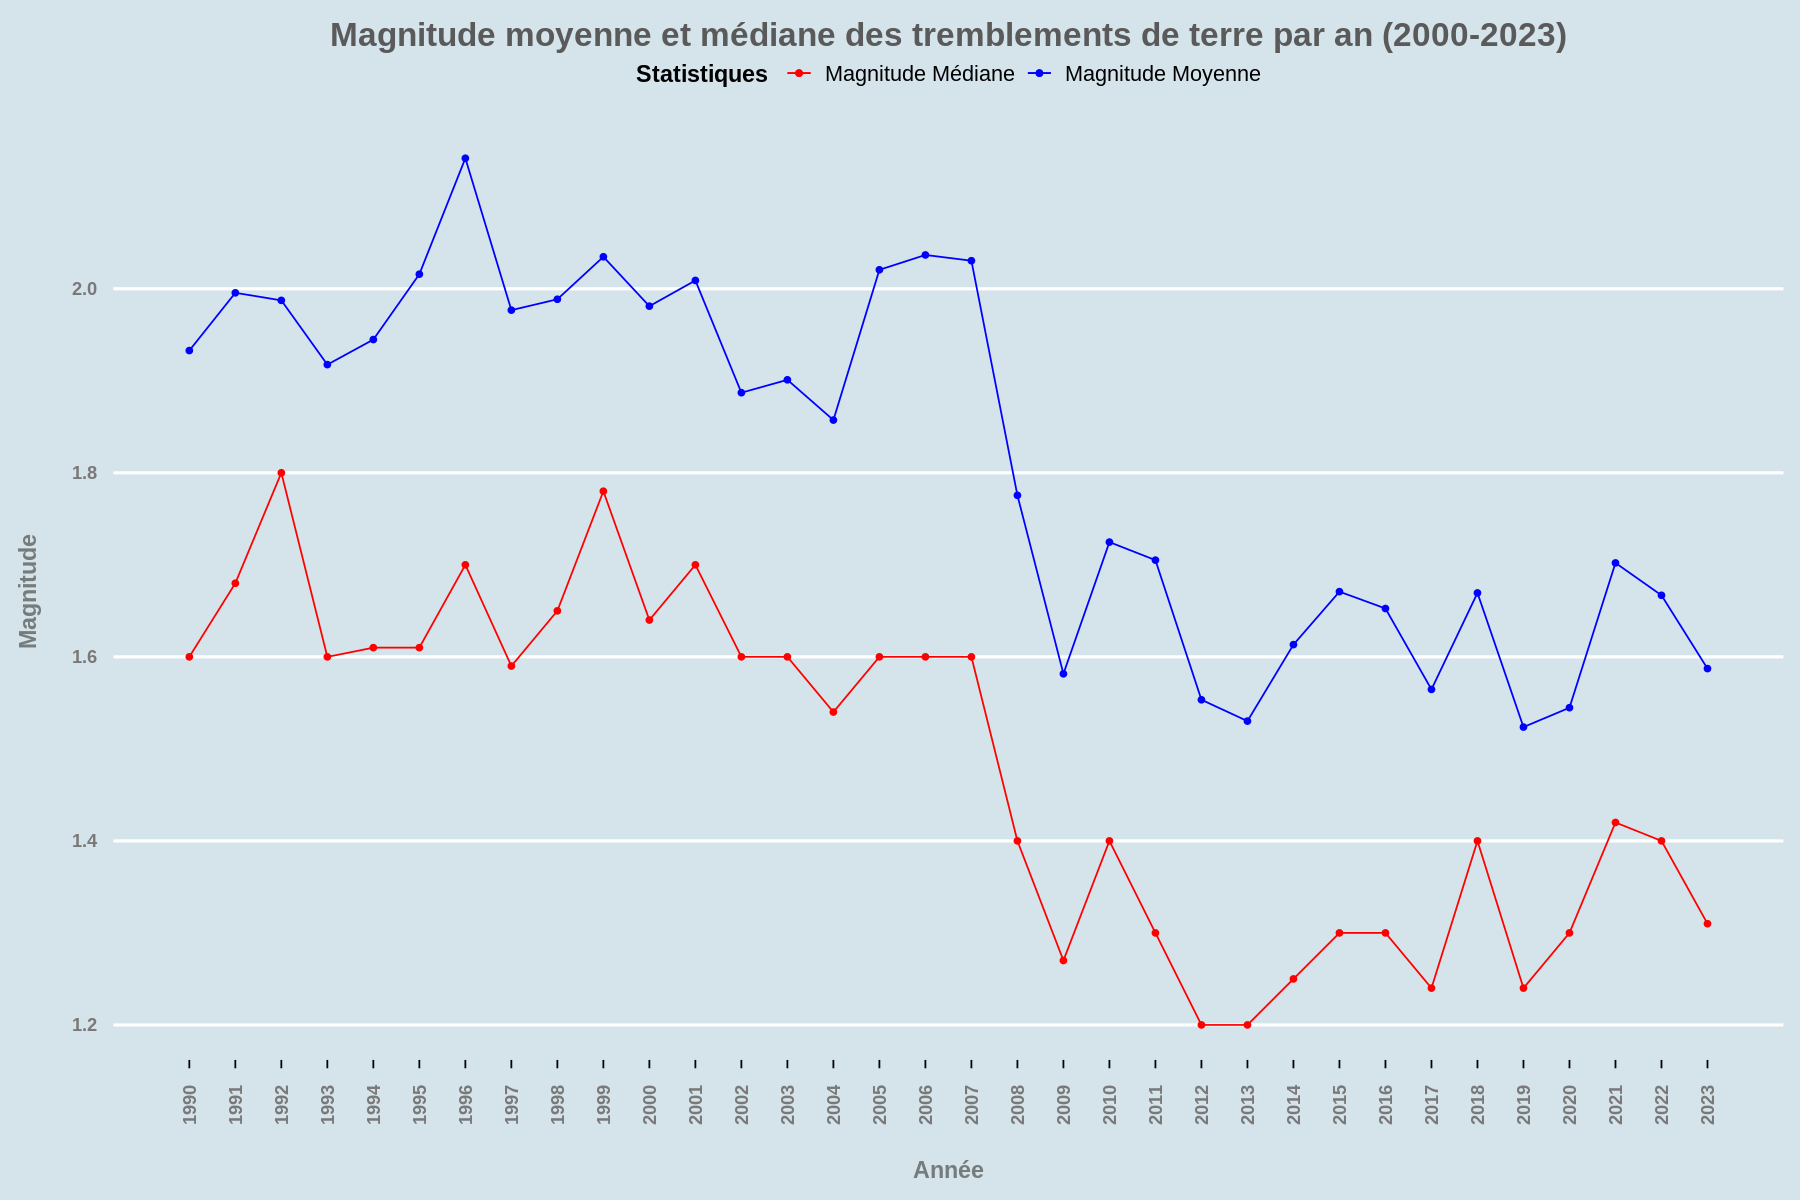

In [ ]:
# Magnitude moyenne et médiane par année des tremblement de terre

library(ggplot2)
library(dplyr)
library(repr)

# Spécifier la largeur et la hauteur du graphique
options(repr.plot.width=15, repr.plot.height=10)

# Convertir la colonne de date en année
df$year <- as.numeric(format(df$date, "%Y"))

# Calculer la moyenne et la médiane des magnitudes par année
summary_stats <- df %>%
  group_by(year) %>%
  summarize(mean_magnitude = mean(mag, na.rm = TRUE),
            median_magnitude = median(mag, na.rm = TRUE))

# Créer un graphique de ligne pour la moyenne des magnitudes par année
graph1 <- ggplot(summary_stats, aes(x = year)) +
  geom_line(aes(y = mean_magnitude, color = "Magnitude Moyenne")) +
  geom_point(aes(y = mean_magnitude, color = "Magnitude Moyenne")) +
  geom_line(aes(y = median_magnitude, color = "Magnitude Médiane")) +
  geom_point(aes(y = median_magnitude, color = "Magnitude Médiane")) +
  labs(x = "Année", y = "Magnitude", title = "Magnitude moyenne et médiane des tremblements de terre par an (1990-2023)") +
  scale_x_continuous(breaks = seq(1990, 2023, by = 1), labels = seq(1990, 2023, by = 1)) +
  scale_y_continuous(limits = c(min(summary_stats$median_magnitude, summary_stats$mean_magnitude),
                                max(summary_stats$median_magnitude, summary_stats$mean_magnitude))) +
  scale_color_manual(name = "Statistiques", values = c("Magnitude Moyenne" = "blue", "Magnitude Médiane" = "red")) +
  theme_economist() +
  theme+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Afficher le graphique
print(graph1)


## Boxplot des magnitudes par année<a class="anchor" id="explo2"></a>

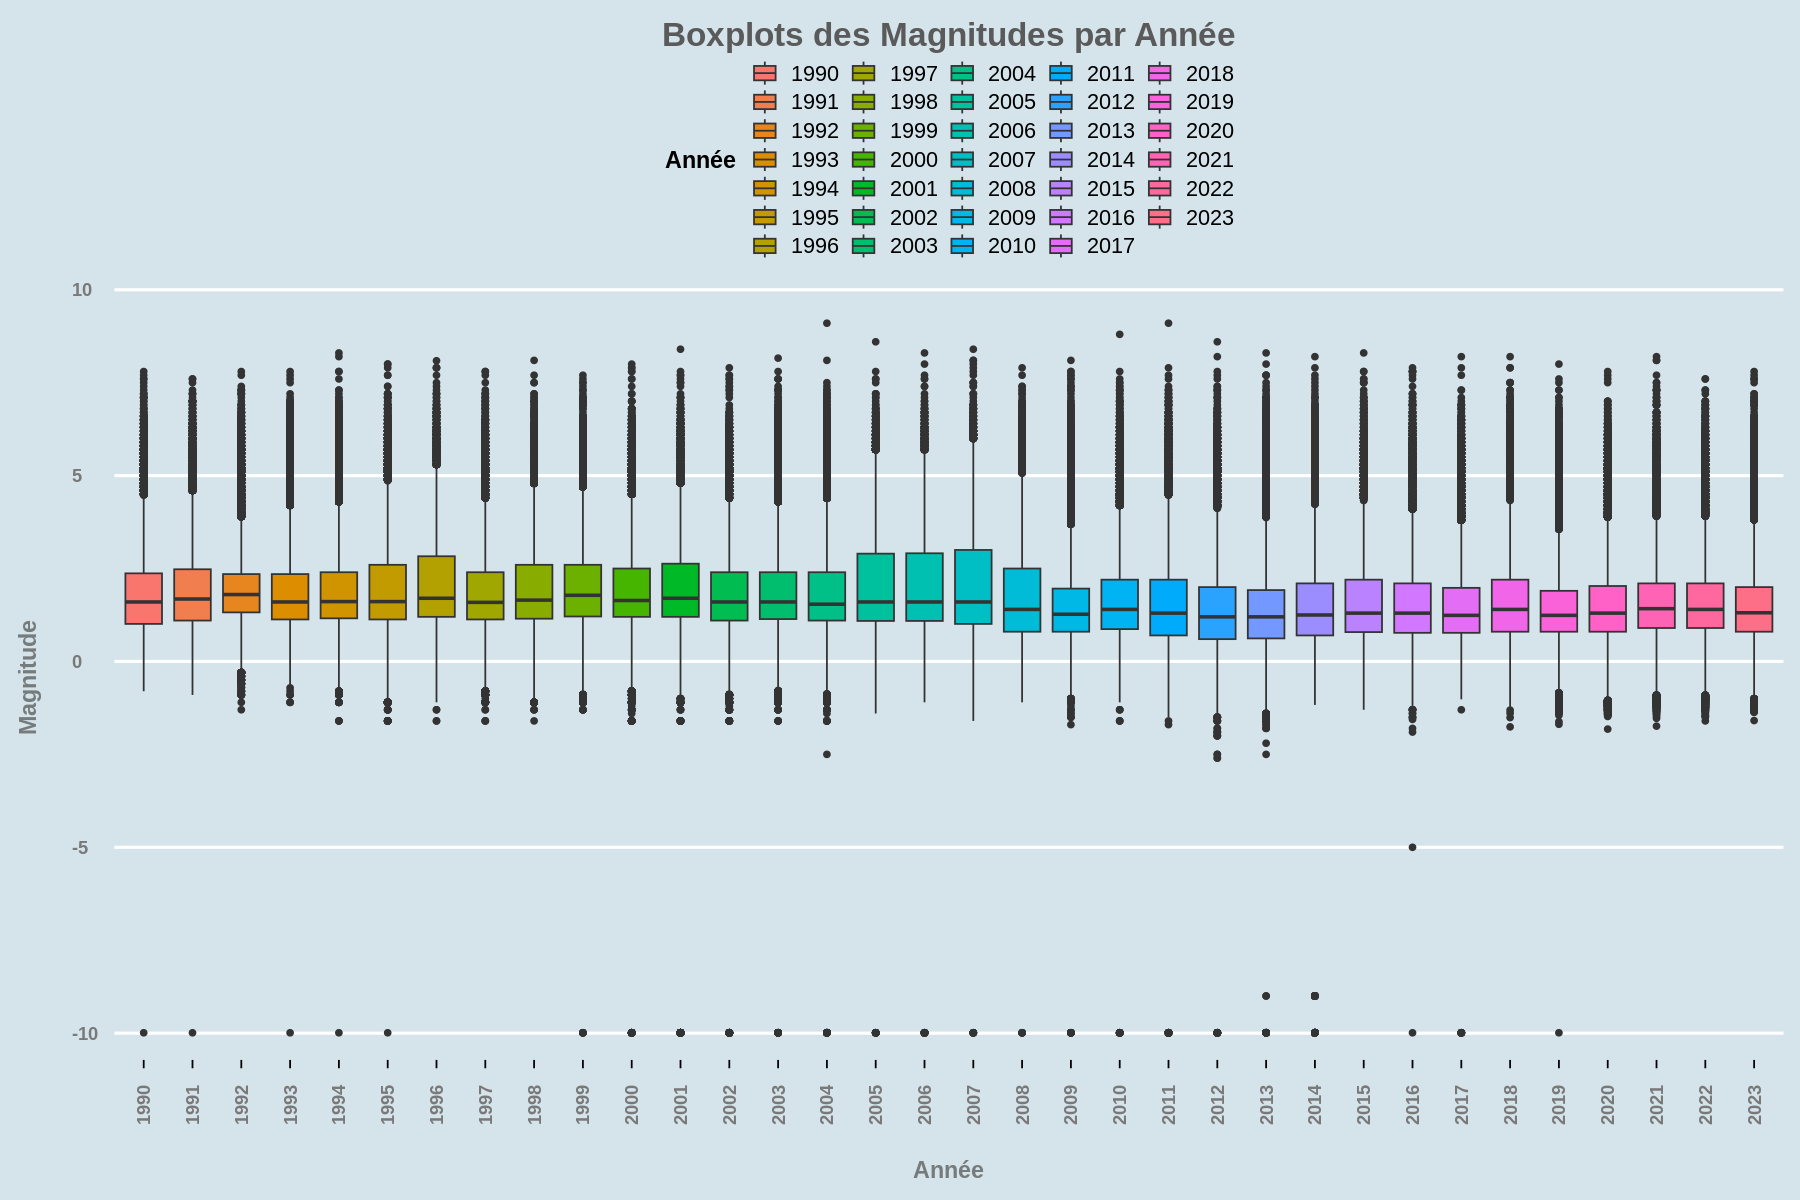

In [ ]:
# Créer le graphique avec un boxplot pour chaque année
graphique <- ggplot(df, aes(x = as.factor(year), y = mag, fill =as.factor(year))) +
  geom_boxplot() +

  labs(title = "Boxplots des Magnitudes par Année",
       x = "Année",
       y = "Magnitude") +
  scale_fill_discrete(name = "Année")+
  theme_economist()+theme+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
graphique

## Magnitude moyenne et médiane par mois<a class="anchor" id="explo3"></a>


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


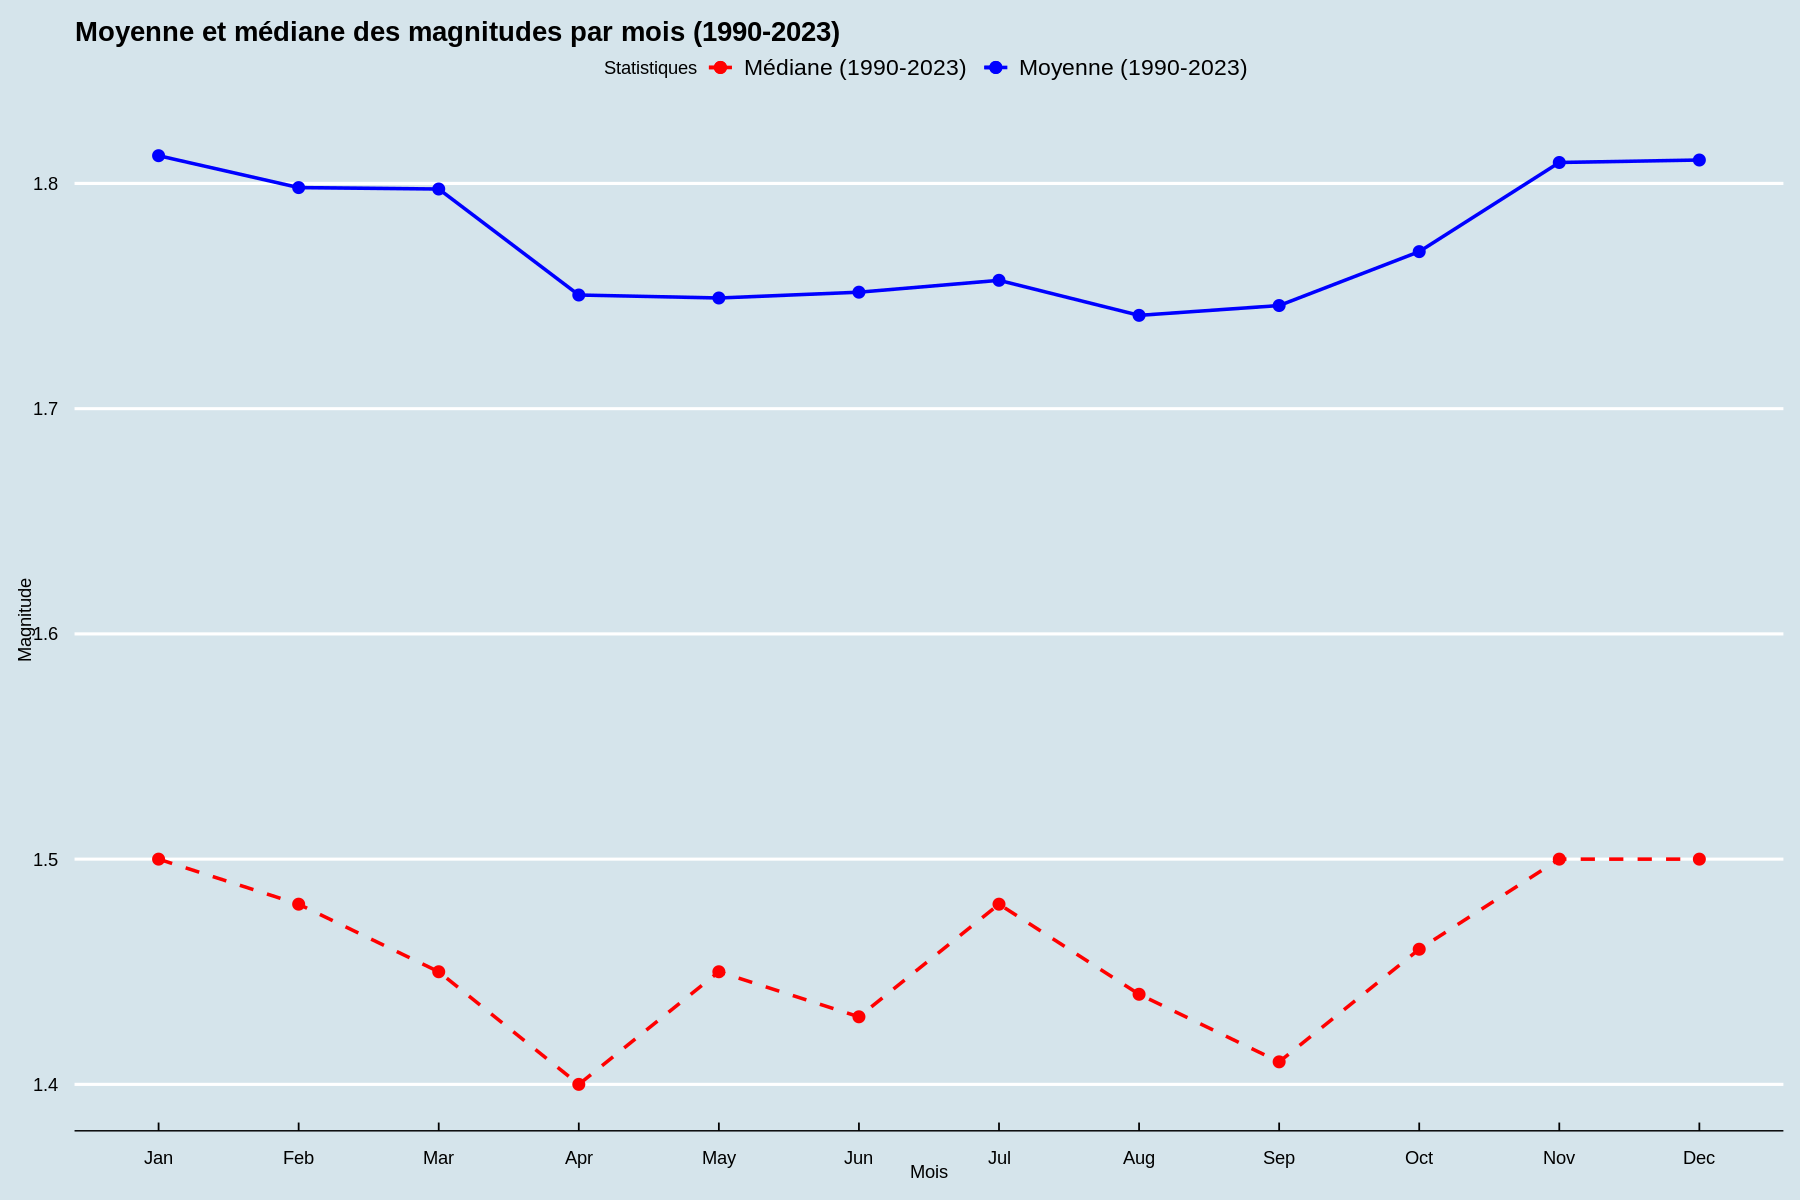

In [ ]:
# Magnitude moyenne et médiane par mois des tremblement de terre

library(lubridate)
# Spécifier la largeur et la hauteur du graphique
options(repr.plot.width = 15, repr.plot.height = 10)

# Convertir la colonne de date en mois et en année
df$month <- month(df$date, label = TRUE)
df$year <- as.numeric(format(df$date, "%Y"))

# Filtrer les données pour la période 1990-2023
data_1990_2023 <- df %>%
  filter(year >= 1990, year <= 2023)

# Calculer la moyenne et la médiane des magnitudes par mois pour 1990-2023
summary_stats_1990_2023 <- data_1990_2023 %>%
  group_by(month) %>%
  summarize(mean_magnitude = mean(mag, na.rm = TRUE),
            median_magnitude = median(mag, na.rm = TRUE))

# Créer le graphique avec légende
graph <- ggplot() +
  geom_line(data = summary_stats_1990_2023, aes(x = month, y = mean_magnitude, color = "Moyenne (1990-2023)", group = 1), size = 1) +
  geom_point(data = summary_stats_1990_2023, aes(x = month, y = mean_magnitude, color = "Moyenne (1990-2023)"), size = 3) +
  geom_line(data = summary_stats_1990_2023, aes(x = month, y = median_magnitude, color = "Médiane (1990-2023)", group = 1), linetype = "dashed", size = 1) +
  geom_point(data = summary_stats_1990_2023, aes(x = month, y = median_magnitude, color = "Médiane (1990-2023)"), size = 3) +
  labs(x = "Mois", y = "Magnitude", title = "Moyenne et médiane des magnitudes par mois (1990-2023)") +
  scale_color_manual(name = "Statistiques", values = c("Moyenne (1990-2023)" = "blue", "Médiane (1990-2023)" = "red")) +
  theme_economist()

# Afficher le graphique
print(graph)

## Magnitude moyenne et médiane par jours<a class="anchor" id="explo4"></a>

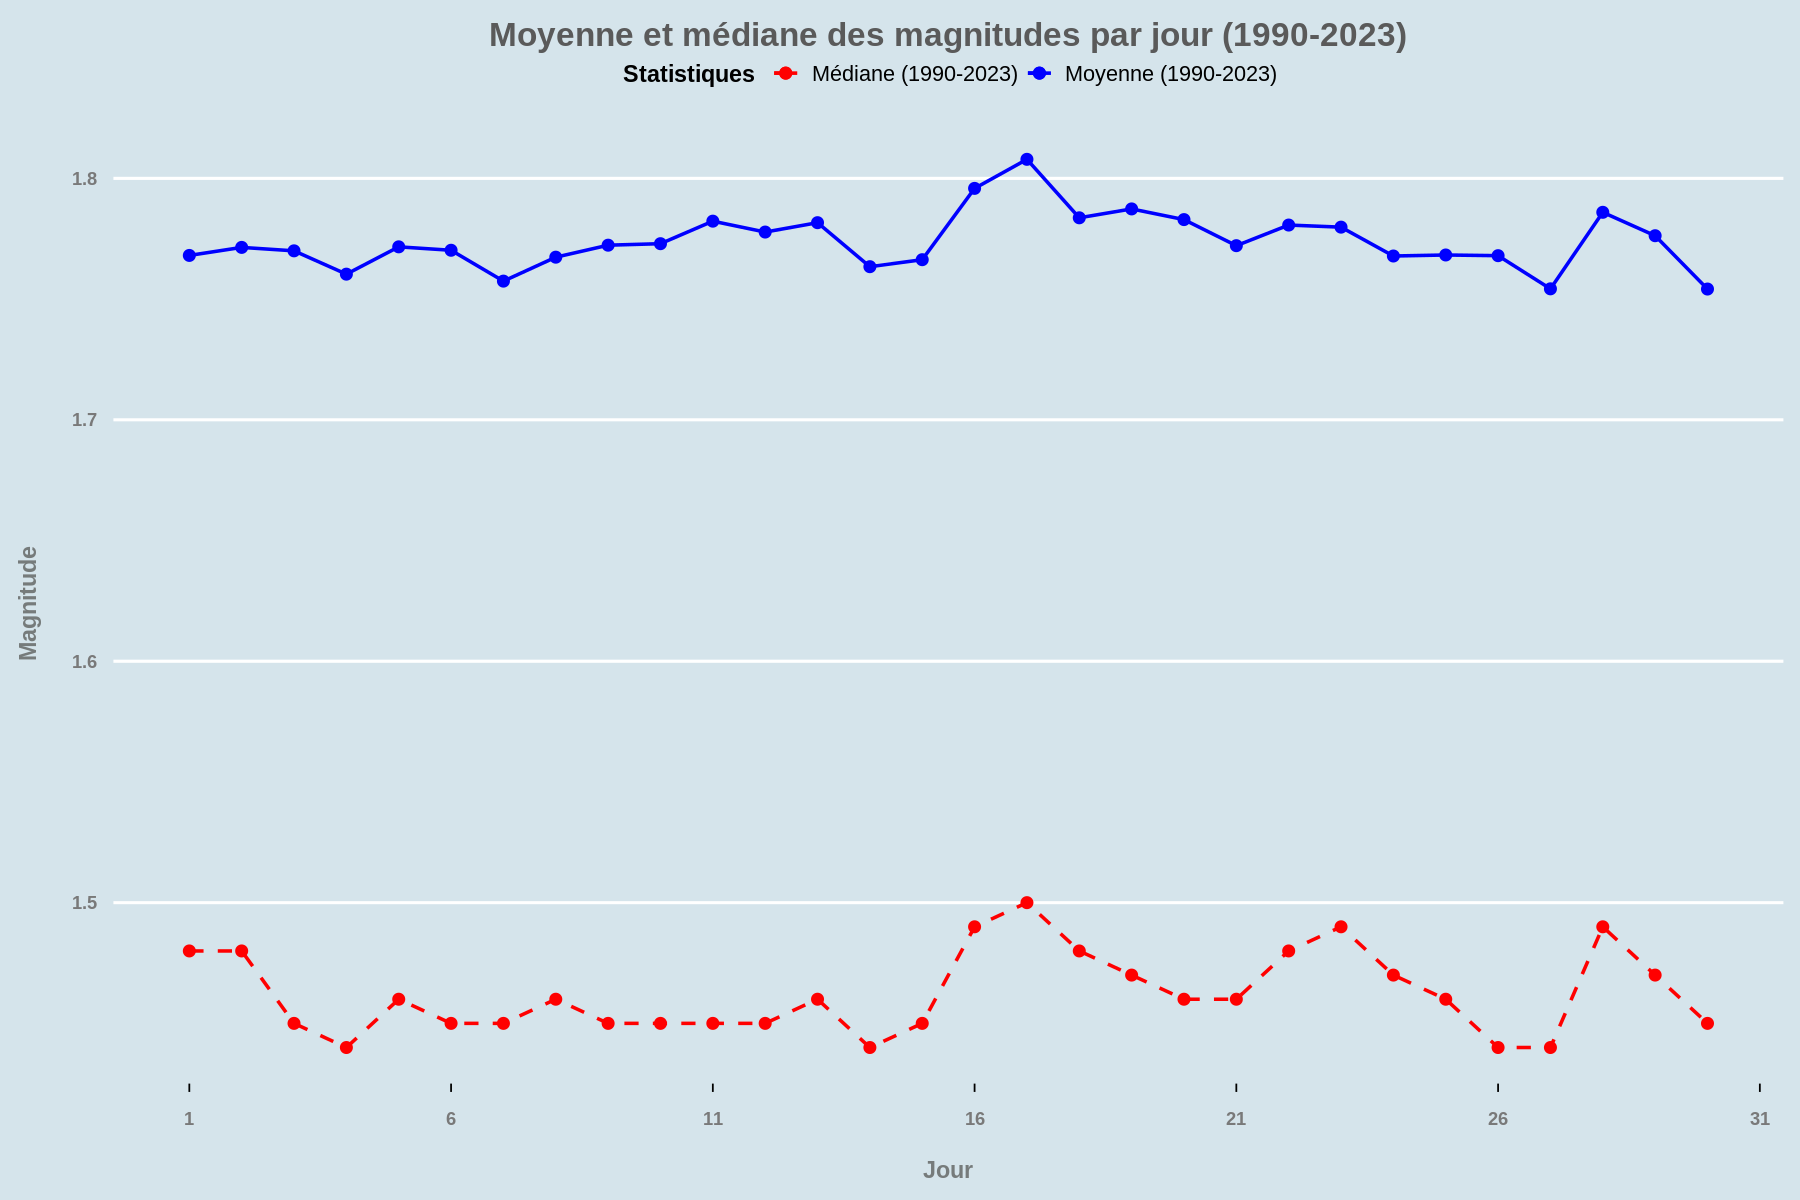

In [ ]:
# Magnitude moyenne et médiane par jours des tremblement de terre

# Spécifier la largeur et la hauteur du graphique
options(repr.plot.width = 15, repr.plot.height = 10)

# Convertir la colonne de date en jour, mois et année
df$day <- day(df$date)
df$month <- month(df$date, label = TRUE)
df$year <- as.numeric(format(df$date, "%Y"))

# Filtrer les données pour la période 1990_2023
data_1990_2023 <- df %>%
  filter(year >= 1990, year <= 2023)

# Calculer la moyenne et la médiane des magnitudes par jour pour 1990_2023
summary_stats_1990_2023 <- data_1990_2023 %>%
  group_by(day) %>%
  summarize(mean_magnitude = mean(mag, na.rm = TRUE),
            median_magnitude = median(mag, na.rm = TRUE))

# Créer le graphique avec légende
graph <- ggplot() +
  geom_line(data = summary_stats_1990_2023, aes(x = day, y = mean_magnitude, color = "Moyenne (1990-2023)", group = 1), size = 1) +
  geom_point(data = summary_stats_1990_2023, aes(x = day, y = mean_magnitude, color = "Moyenne (1990-2023)"), size = 3) +
  geom_line(data = summary_stats_1990_2023, aes(x = day, y = median_magnitude, color = "Médiane (1990-2023)", group = 1), linetype = "dashed", size = 1) +
  geom_point(data = summary_stats_1990_2023, aes(x = day, y = median_magnitude, color = "Médiane (1990-2023)"), size = 3) +
  labs(x = "Jour", y = "Magnitude", title = "Moyenne et médiane des magnitudes par jour (1990-2023)") +
  scale_color_manual(name = "Statistiques", values = c("Moyenne (1990-2023)" = "blue", "Médiane (1990-2023)" = "red")) +
  scale_x_continuous(breaks = seq(1, 31, by = 5))+
theme_economist() + theme

# Afficher le graphique
print(graph)

## Top 10 des lieux avec le plus grand nombre de tremblement de terre<a class="anchor" id="explo5"></a>

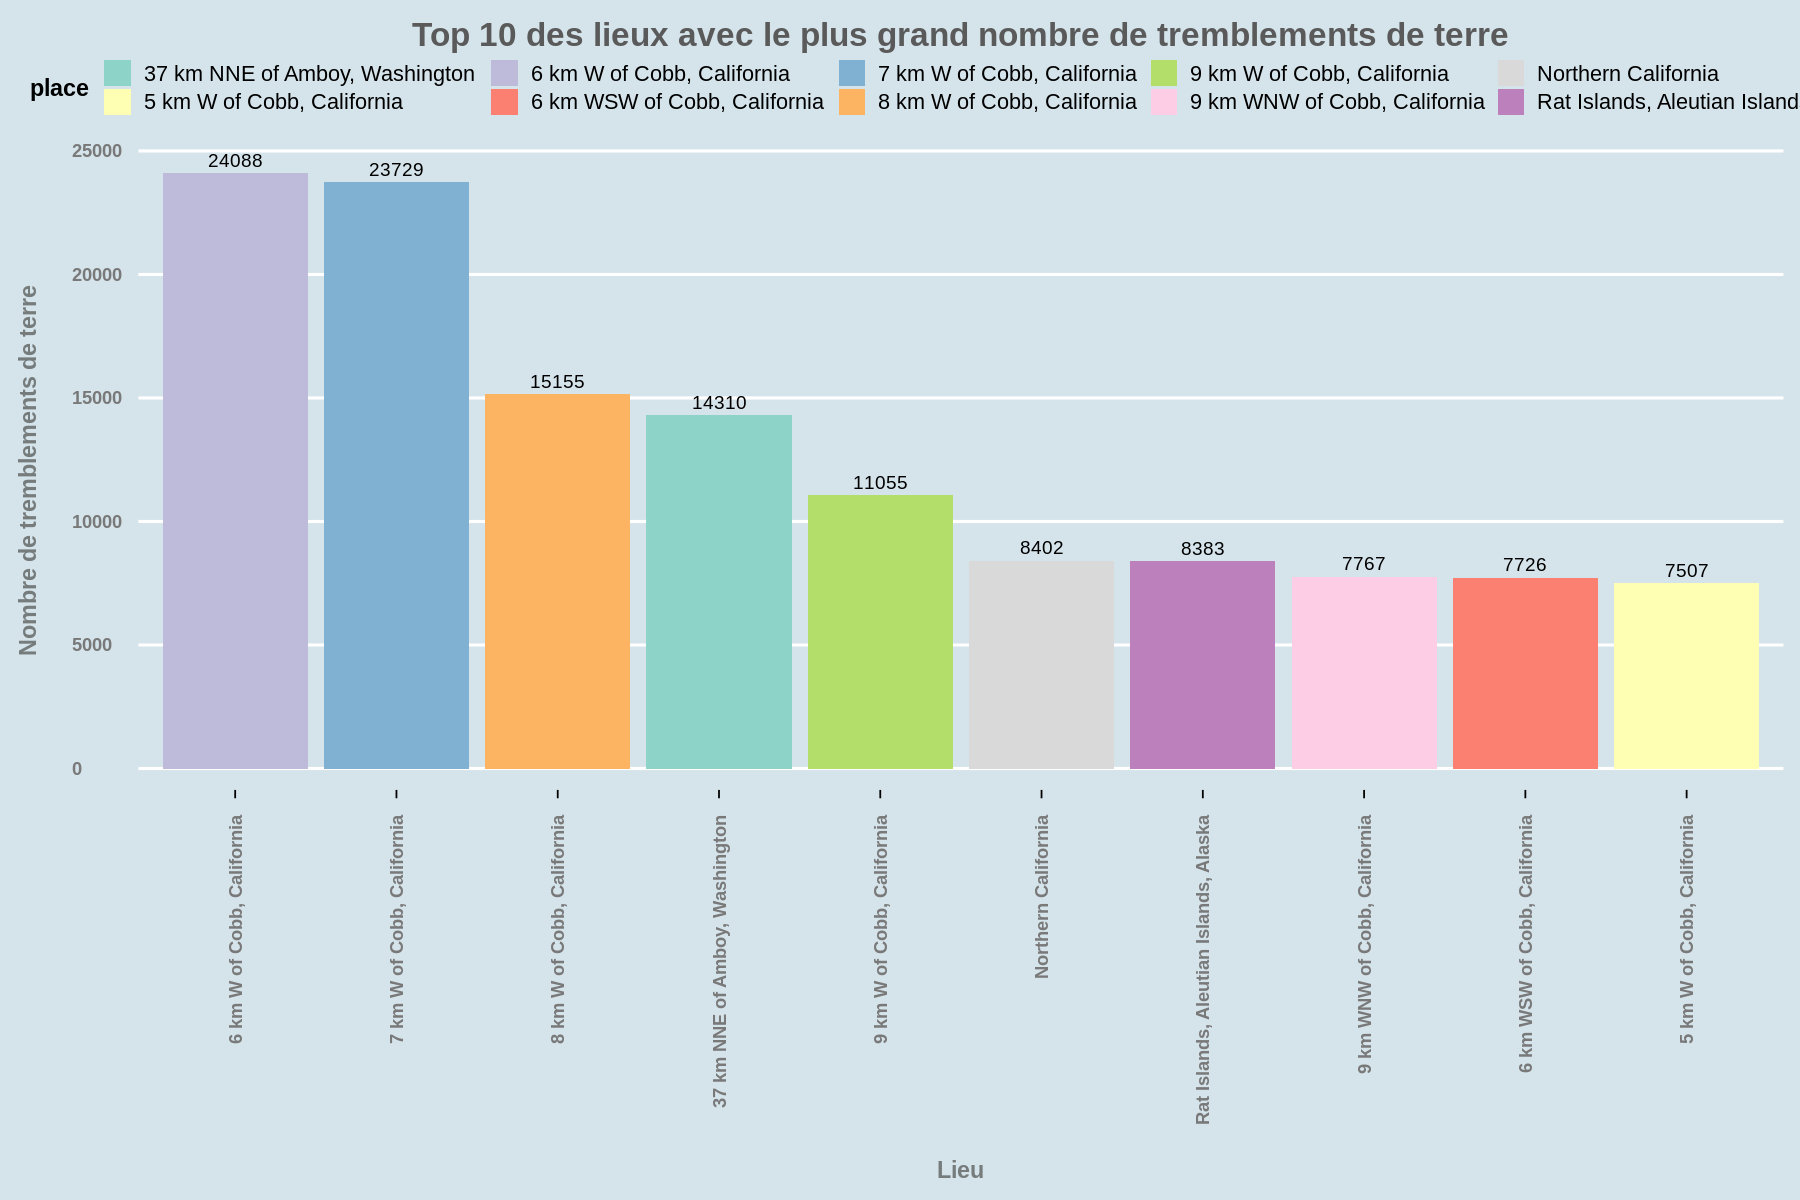

In [ ]:
#

# Spécifier la largeur et la hauteur du graphique
options(repr.plot.width = 15, repr.plot.height = 10)

# Calculer le décompte des valeurs pour chaque valeur unique dans la colonne 'place'
top10_place <- df %>%
  count(place) %>%
  arrange(desc(n)) %>%
  slice(1:10)

# Créer un graphique à barres avec ggplot2
plot <- ggplot(top10_place, aes(x = reorder(place, -n), y = n, fill = place)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = n), vjust = -0.5, size = 4) +
  scale_fill_brewer(palette = "Set3") +  # Utiliser une palette différente
  labs(
    title = "Top 10 des lieux avec le plus grand nombre de tremblements de terre",
    x = "Lieu",
    y = "Nombre de tremblements de terre"
  ) +
  theme_economist() + theme +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Afficher le graphique
print(plot)


## Occurrences de tremblement de terre par année<a class="anchor" id="explo6"></a>

In [ ]:
install.packages("viridis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




Loading required package: viridisLite



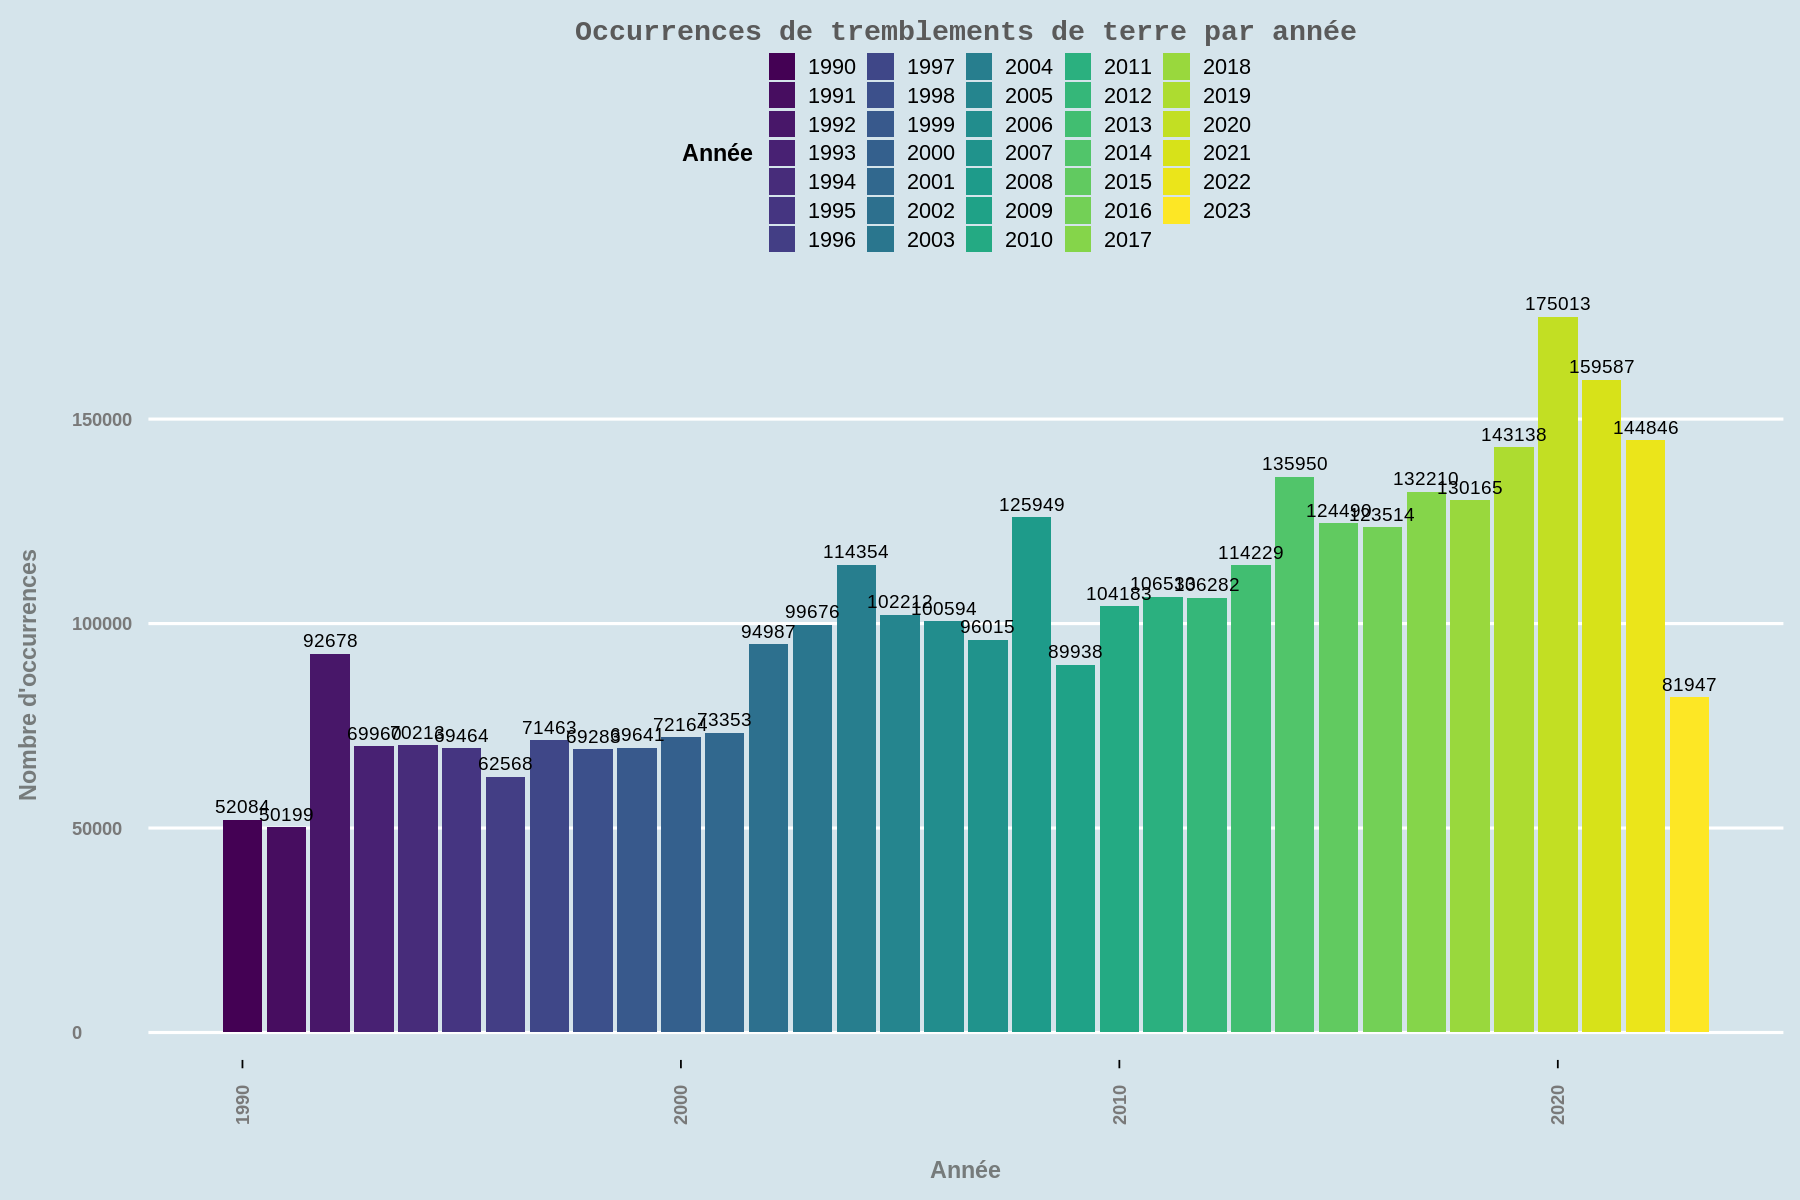

In [ ]:
library(viridis)
# Calculer le décompte des valeurs pour chaque valeur unique dans la colonne 'year'
year_counts <- df %>%
  count(year)

# Trier les années par ordre croissant
sorted_years <- year_counts %>%
  arrange(year) %>%
  select(year, n)

# Créer un graphique à barres avec ggplot2
plot <- ggplot(sorted_years, aes(x = year, y = n, fill = as.factor(year))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = n), vjust = -0.5, size = 4) +
  scale_fill_viridis_d(name = "Année")+
  labs(
    title = "Occurrences de tremblements de terre par année",
    x = "Année",
    y = "Nombre d'occurrences"
  ) +
    theme_economist() +theme+
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    plot.title = element_text(size = 17, family = "Franklin Gothic")
  )

# Afficher le graphique
print(plot)

Pour 2023, nous ne disposons pas de toutes les données car les données s'arrêtent au mois de juillet

## Top 20 des tremblement de terre les plus puissants<a class="anchor" id="explo7"></a>

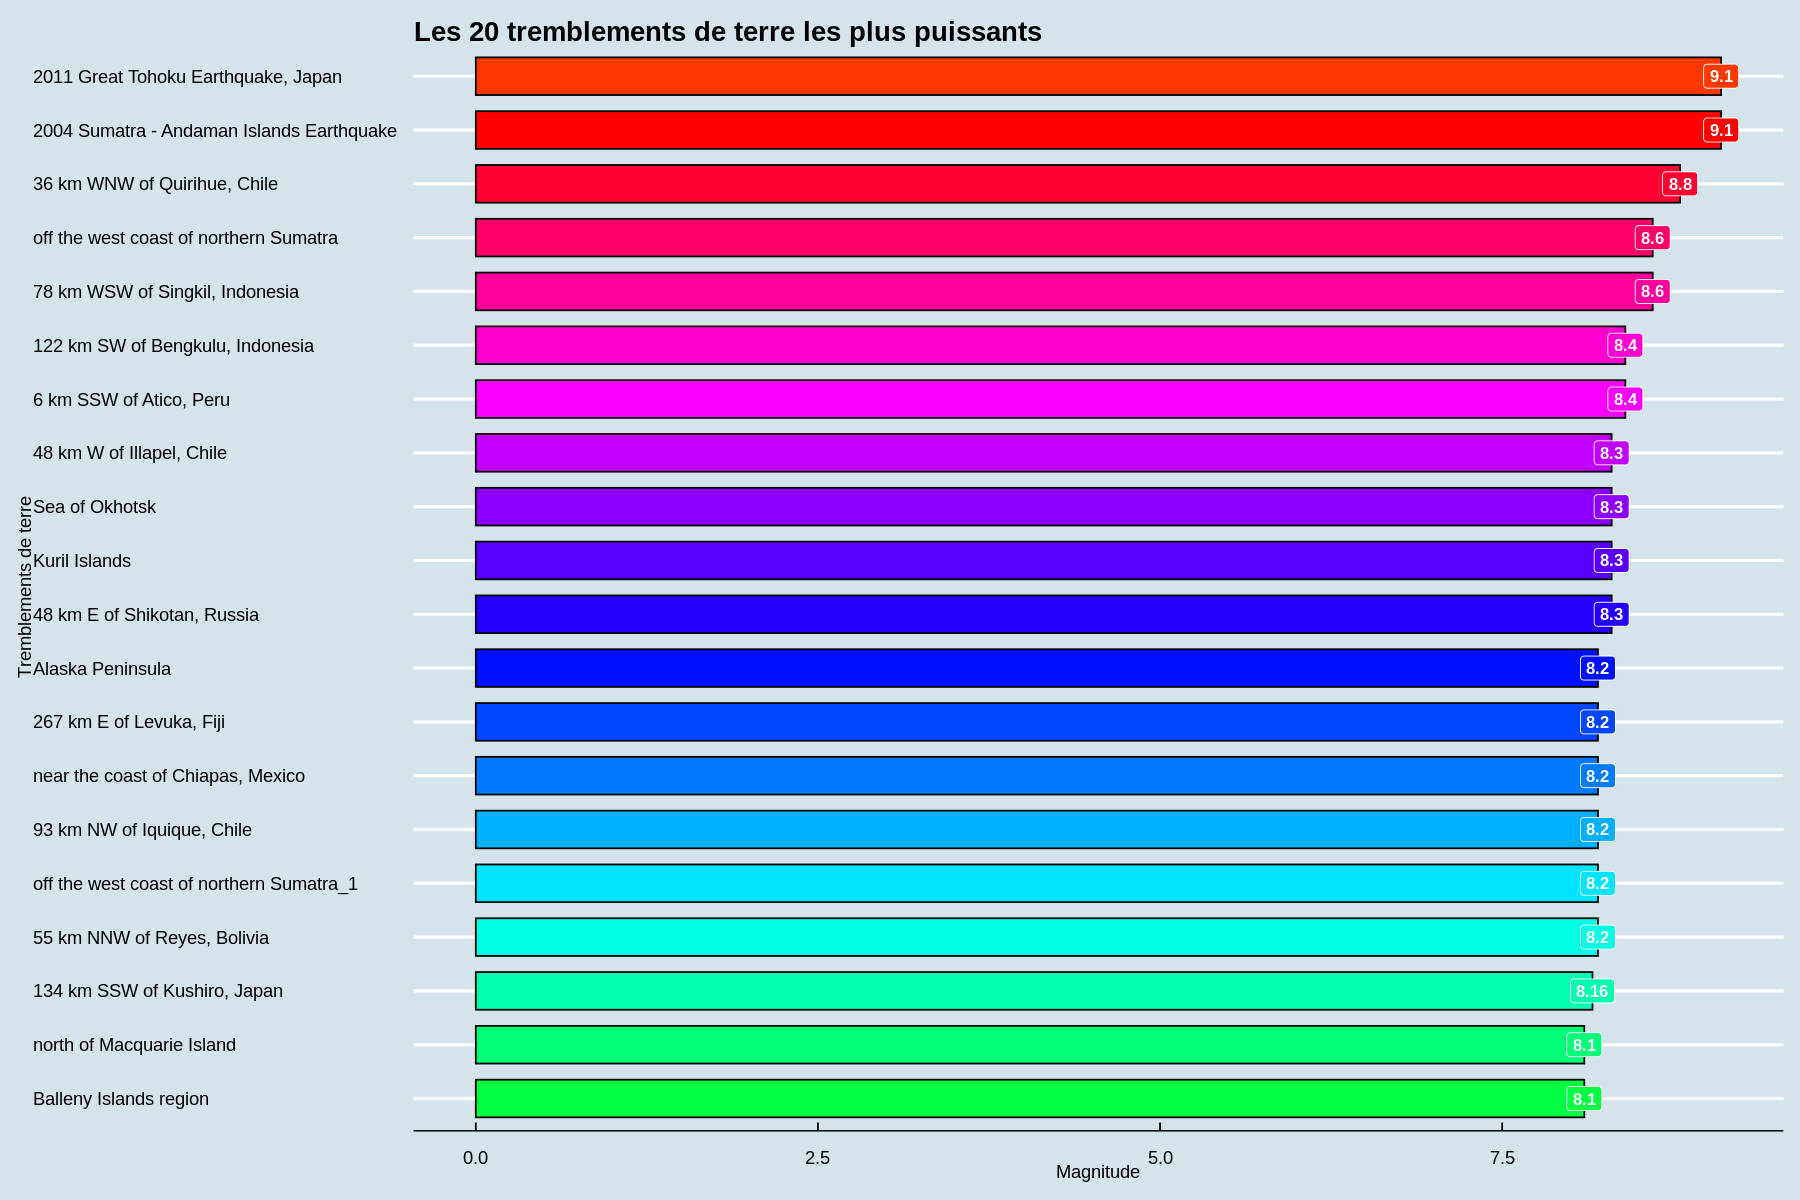

In [ ]:
# Spécifier la largeur et la hauteur du graphique
options(repr.plot.width = 15, repr.plot.height = 10)

# Sélectionner les 20 premières lignes triées par 'magnitudo' de manière décroissante
top_mag <- df %>%
  arrange(desc(mag)) %>%
  head(20)

# Ajouter "_1" à la fin des éléments en doublons dans la colonne "place"
top_mag <- top_mag %>%
  mutate(place_modified = make.unique(place, sep = "_")) %>%
  select(-place) %>%
  rename(place = place_modified)

# Générer un vecteur de 20 couleurs dégradé
vecteur_couleurs <- c("#ff3700","#ff0200","#ff0032","#ff0067","#ff009c","#ff00d1","#f700ff","#c200ff",
"#8d00ff","#5800ff","#2300ff","#0011ff","#0046ff","#007bff","#00b0ff","#00e5ff","#00ffe3","#00ffae","#00ff79","#00ff43")
vecteur_couleurs <- rev(vecteur_couleurs)

top_mag <- top_mag[order(top_mag$mag,decreasing = F),]
top_mag = transform(top_mag,place = reorder(place,order(mag, decreasing = F)))


# Utiliser ggplot avec la palette de couleurs personnalisée
plot <- ggplot(data = top_mag, aes(x = reorder(place, +mag), y = mag, fill = place)) +
  geom_bar(stat = "identity", width = 0.7, color = "black", show.legend = FALSE, position = "dodge") +
  ggtitle("Les 20 tremblements de terre les plus puissants") +
  ylab("Magnitude") + xlab("Tremblements de terre") +
  coord_flip() +

  geom_label(aes(label = mag, fill = factor(place)), size = 3.5, show.legend = FALSE,
             fontface = "bold", color = "white") +

  scale_fill_manual(values = vecteur_couleurs) +

  theme_economist() + theme()

# Afficher le graphique
print(plot)


## Top 10 des états/pays avec le plus grand nombre de tremblement de terre<a class="anchor" id="explo8"></a>

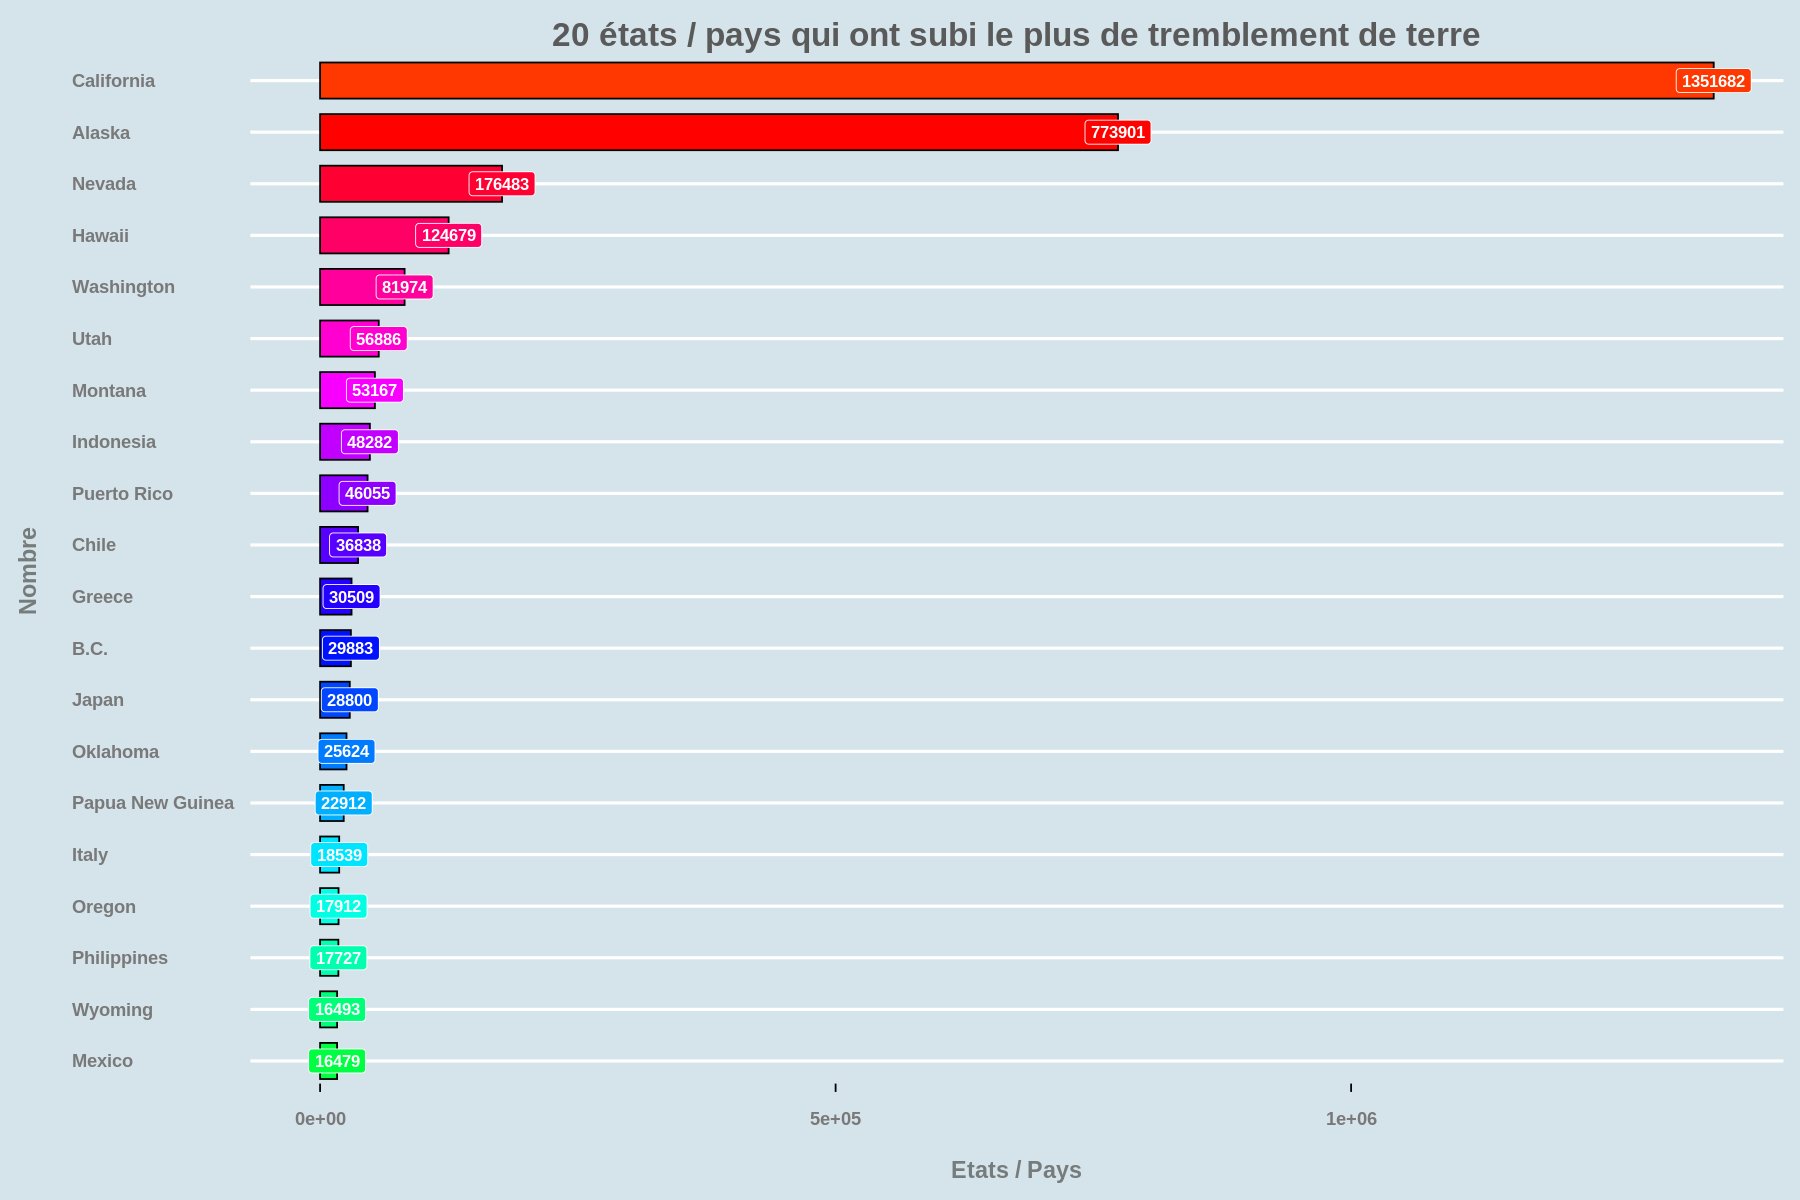

In [ ]:
library(viridis)
library(dplyr)
library(ggplot2)

# Calculer le décompte des valeurs pour chaque valeur unique dans la colonne 'state'
state_counts <- df %>%
  group_by(state)%>%
  count(state)

# Trier les états par ordre croissant
sorted_state <- state_counts %>%
  arrange(desc(n))%>%
  head(20)

# Générer un vecteur de 20 couleurs dégradé
vecteur_couleurs <- c("#ff3700","#ff0200","#ff0032","#ff0067","#ff009c","#ff00d1","#f700ff","#c200ff",
"#8d00ff","#5800ff","#2300ff","#0011ff","#0046ff","#007bff","#00b0ff","#00e5ff","#00ffe3","#00ffae","#00ff79","#00ff43")
vecteur_couleurs <- rev(vecteur_couleurs)

sorted_state <- sorted_state[order(sorted_state$n,decreasing = F),]
sorted_state = transform(sorted_state,place = reorder(state,order(n, decreasing = F)))

sorted_state_filtered <- sorted_state %>%
  filter(n > 5)


# Utiliser ggplot avec la palette de couleurs personnalisée
plot <- ggplot(data = sorted_state_filtered, aes(x = reorder(place, +n), y = n, fill = place)) +
  geom_bar(stat = "identity", width = 0.7, color = "black", show.legend = FALSE, position = "dodge") +
  ggtitle("20 états / pays qui ont subi le plus de tremblement de terre") +
  ylab("Etats / Pays") + xlab("Nombre") +
  coord_flip() +

  geom_label(aes(label = n), size = 3.5, show.legend = FALSE,
             fontface = "bold", color = "white") +

  scale_fill_manual(values = vecteur_couleurs) +

  theme_economist() + theme

# Afficher le graphique
print(plot)


## Variable Tsunami<a class="anchor" id="explo9"></a>

In [ ]:
head(data$tsunami)

[1] 0 0 0 0 0 0

In [ ]:
# On recode sous forme caractère
data_tsu <- df %>%
  mutate(tsunami = ifelse(tsunami == 1, 'Oui', 'Non'))
head(data_tsu$tsunami)

[1] "Non" "Non" "Non" "Non" "Non" "Non"

In [ ]:
nrow(data_tsu)

[1] 3428882

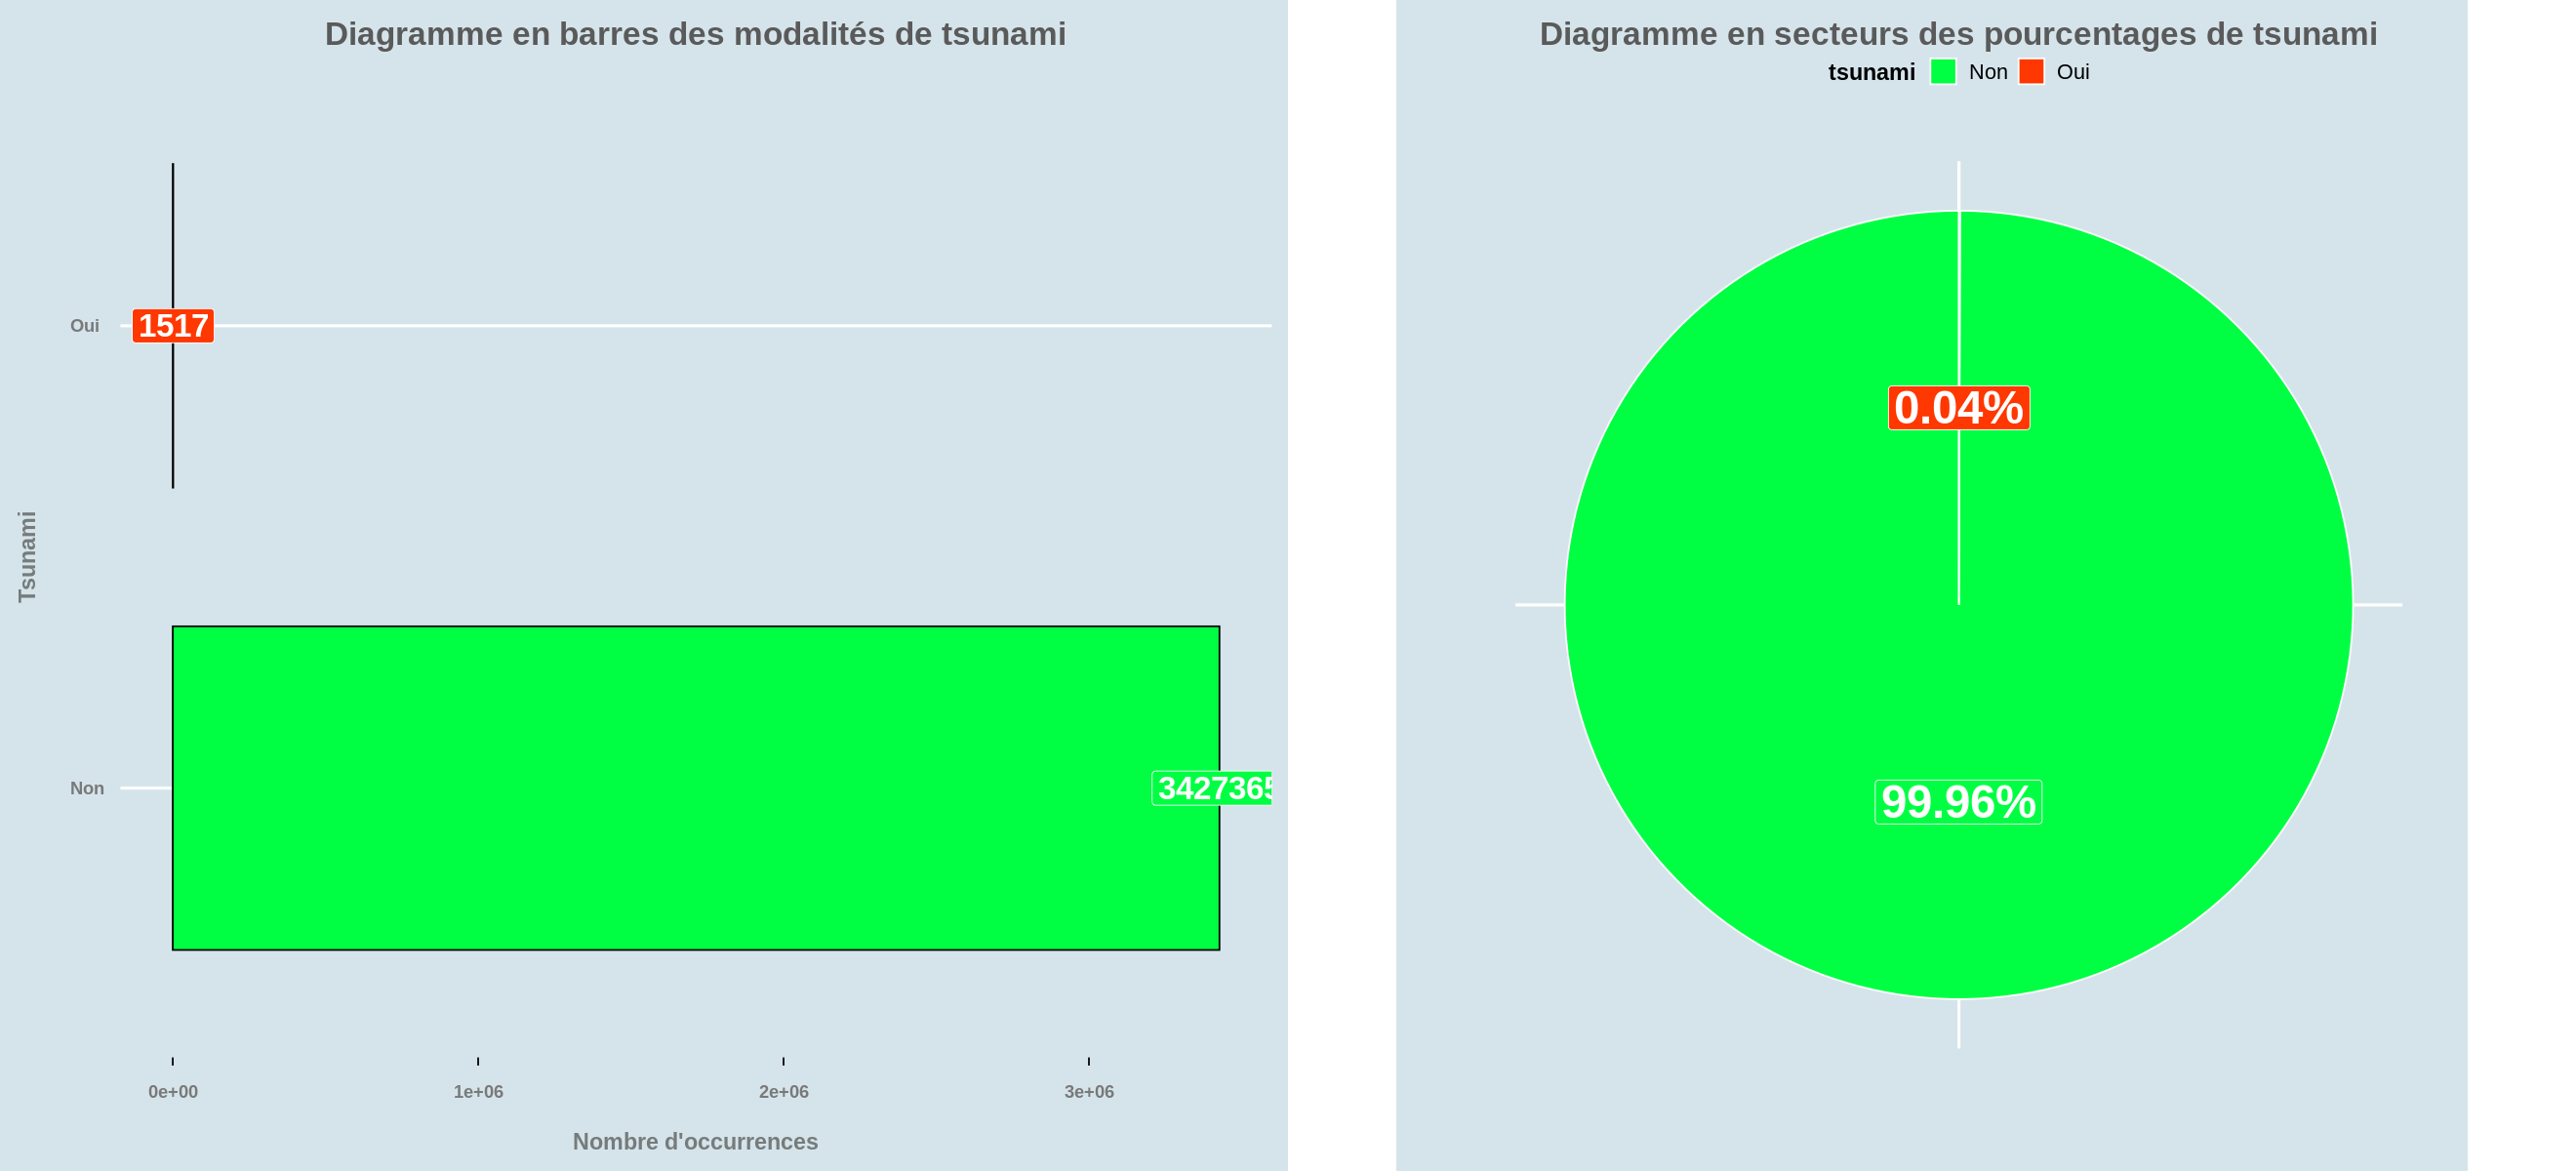

In [ ]:
vecteur_couleurs <- rev(c("#ff3700","#00ff43"))

# Spécifier la largeur et la hauteur du graphique
options(repr.plot.width = 22, repr.plot.height = 10)


library(ggplot2)
library(dplyr)

tsunami_counts <- data_tsu %>%
  count(tsunami)


# Diagramme en barres
bar_plot <- ggplot(data_tsu, aes(x = tsunami ,fill = tsunami)) +
  geom_bar(width = 0.7, color = "black", show.legend = FALSE, position = "dodge") +
  ggtitle("Diagramme en barres des modalités de tsunami") +
  labs(x = "Tsunami", y = "Nombre d'occurrences") +
  scale_fill_manual(values = vecteur_couleurs) +
  geom_label(data = tsunami_counts, aes(x = tsunami, y = n, label = as.character(n)),
             position = position_stack(vjust = 1), size = 7, show.legend = FALSE,
             fontface = "bold", color = "white") +
  coord_flip() +
  theme_economist() + theme

# Calculer les pourcentages
tsunami_percentages <- data_tsu %>%
  count(tsunami) %>%
  mutate(percentage = n / sum(n) * 100)

# Diagramme en secteurs (pie chart)
pie_chart <- ggplot(tsunami_percentages, aes(x = "", y = percentage, fill = tsunami)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y") +
  ggtitle("Diagramme en secteurs des pourcentages de tsunami") +
  scale_fill_manual(values = vecteur_couleurs) +
  geom_label(aes(label = paste0(round(percentage,2)

,"%")), position = position_stack(vjust = .5),size = 10, show.legend = FALSE,
             fontface = "bold", color = "white") +
  theme_economist() + theme+
    labs(x="",y="")+
  theme(axis.text.y = element_blank(),
axis.text.x = element_blank(),
axis.text = element_blank(), axis.title = element_blank())

# Afficher les graphiques côte à côte
grid.arrange(bar_plot, pie_chart, ncol = 2)

## Variable Significance (Impact)<a class="anchor" id="explo10"></a>

In [ ]:
colnames(data)

[1] "time"         "place"        "status"       "tsunami"      "significance"
 [6] "data_type"    "magnitudo"    "state"        "longitude"    "latitude"    
[11] "depth"        "date"

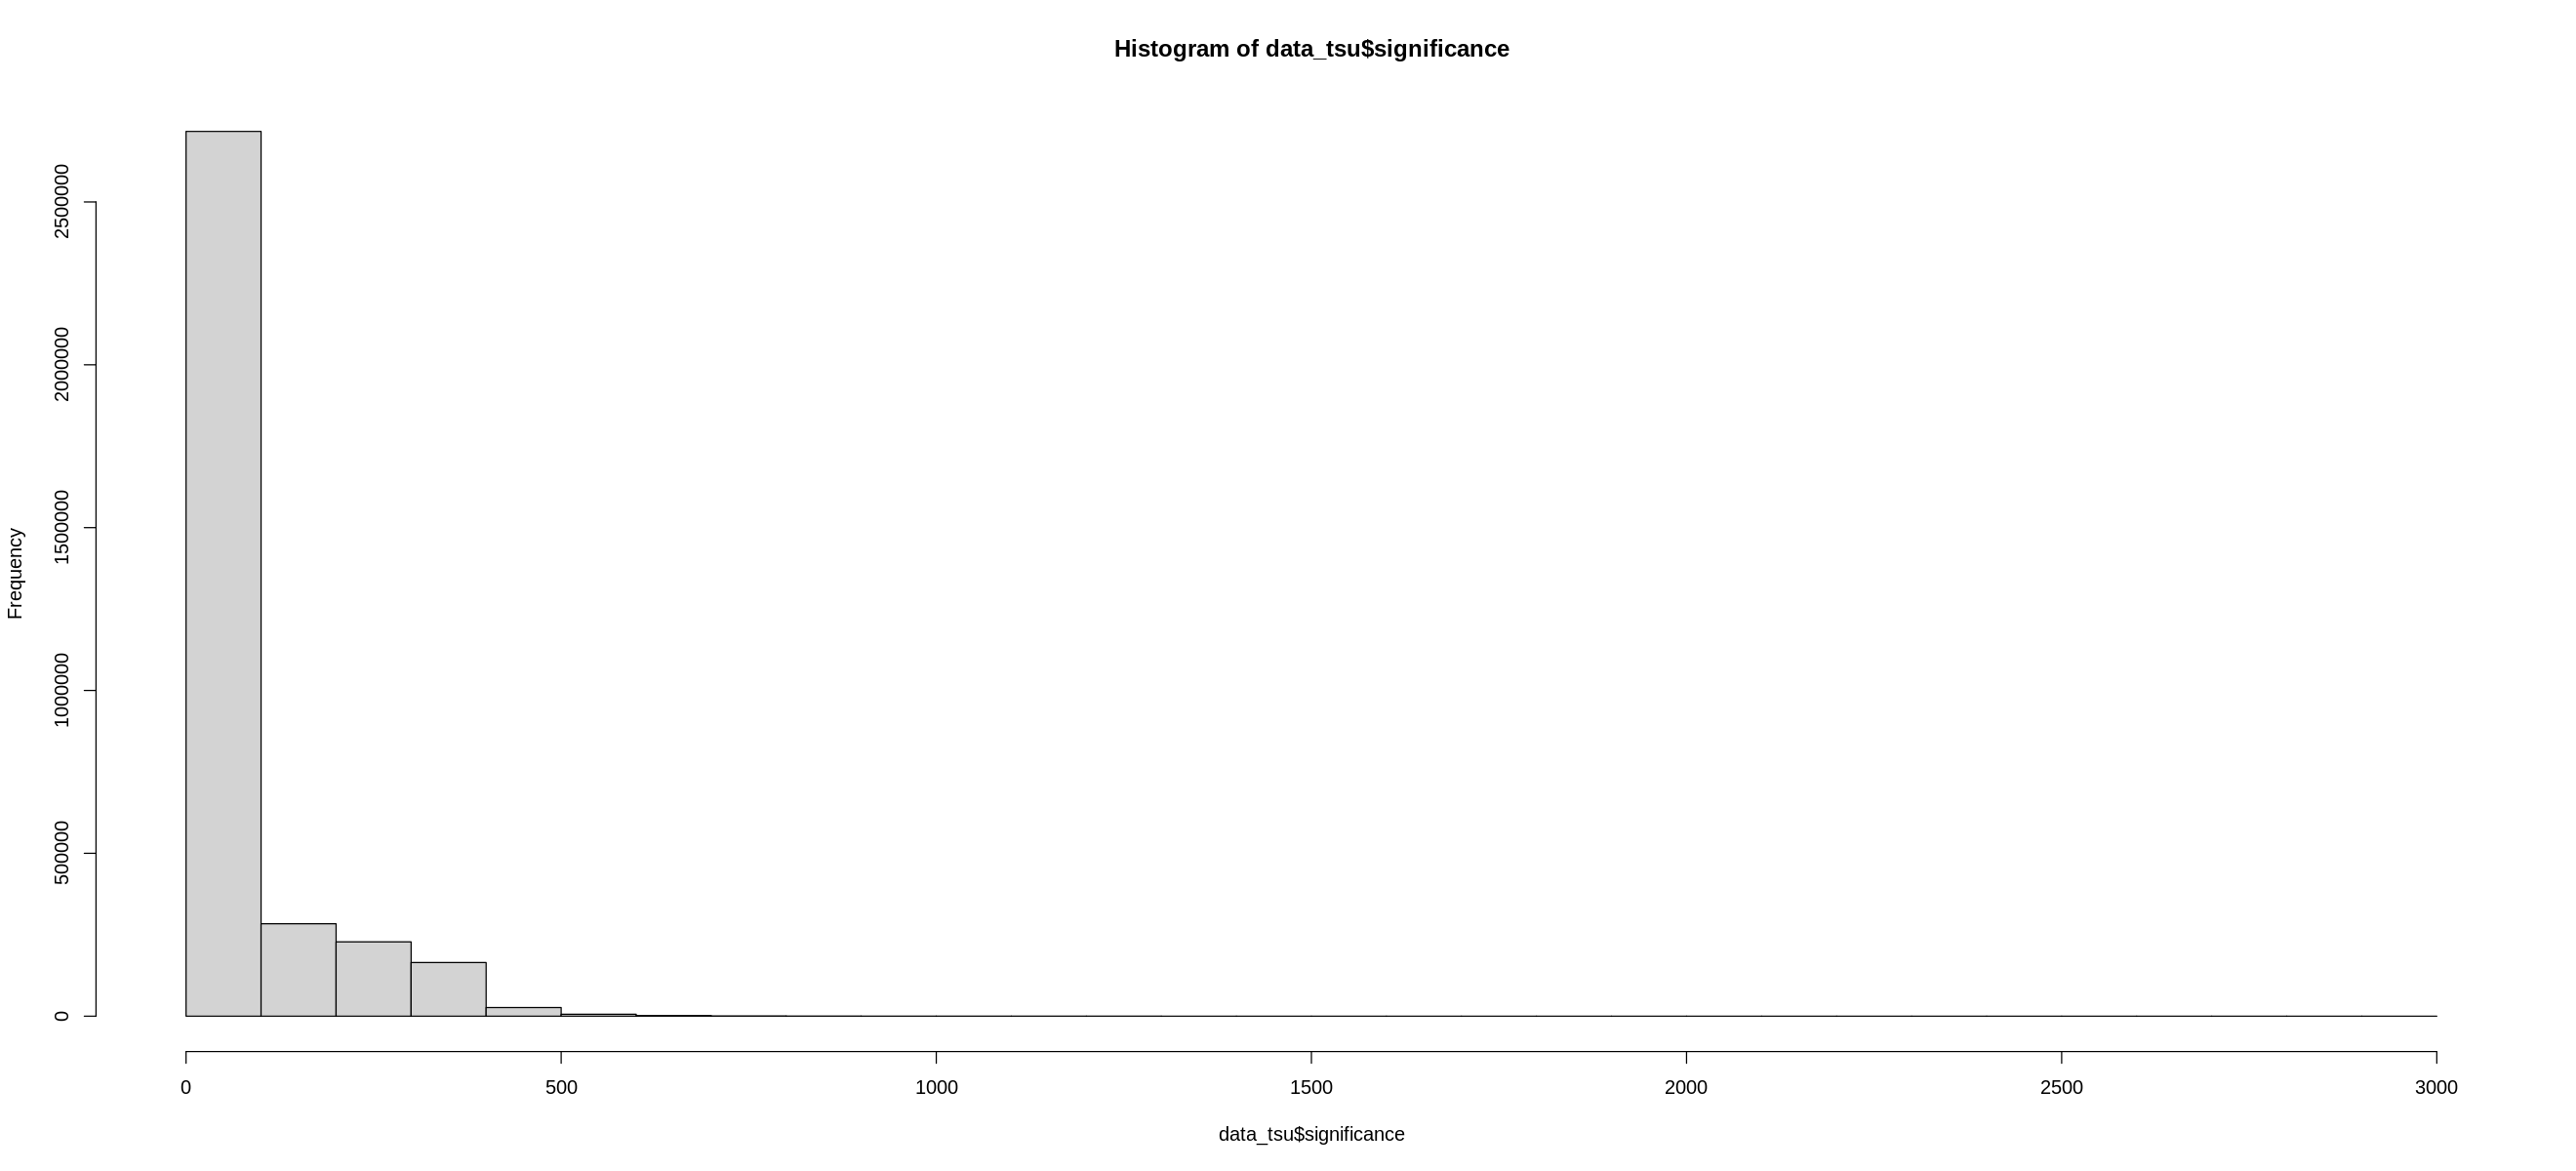

In [ ]:
hist(df$significance)

In [ ]:
cor(df$mag,df$significance)

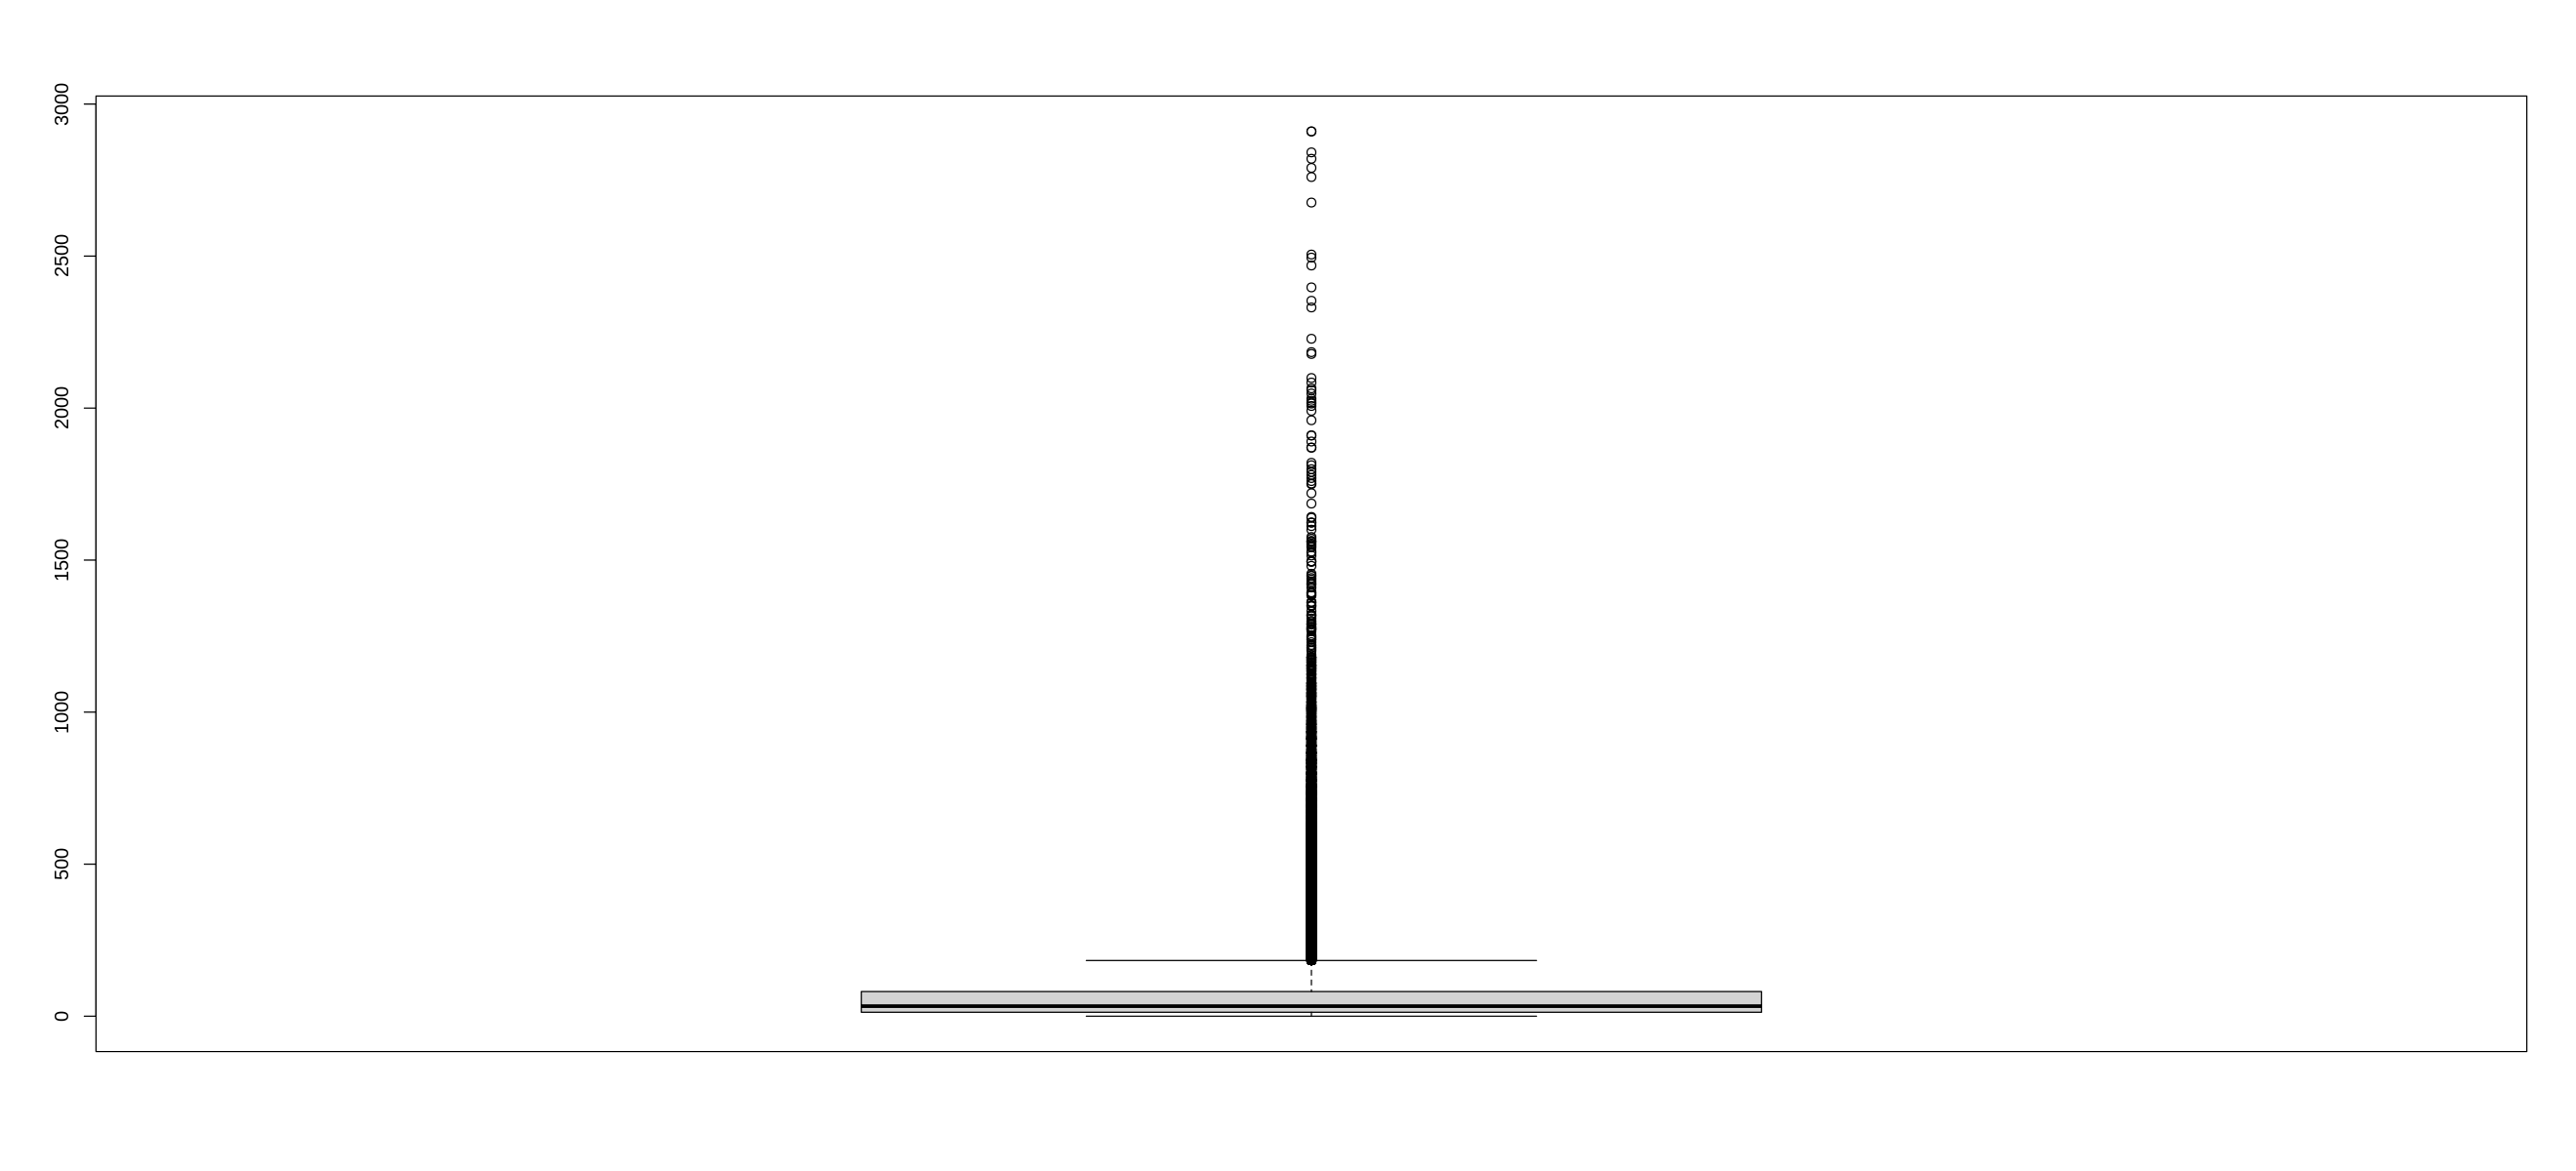

In [ ]:
boxplot(df$significance)

In [ ]:
# On cher le max pour vois si c'est anormal
summary(df$significance
)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   13.00   33.00   74.01   81.00 2910.00 

In [ ]:
# Ici les valeurs extrêmes sont ceux avec des séismes puissants qui ont été dévastateur
subset(df,df$significance==2910)

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2567851,1.504846e+12,"near the coast of Chiapas, Mexico",reviewed,Oui,2910,earthquake,8.2,Mexico,-93.8993,15.0222,47.39,2017-09-08 04:49:19.180000+00:00
3375832,1.675646e+12,"Pazarcik earthquake, Kahramanmaras earthquake sequence",reviewed,Non,2910,earthquake,7.8,Kahramanmaras earthquake sequence,37.0143,37.2256,10.00,2023-02-06 01:17:34.342000+00:00


## Carte interactive du monde des seismes selon la magnitudes avec filtre sur la date<a class="anchor" id="explo11"></a>

In [ ]:
# Utilisation de SHINY
# Le déploiement sur Shiny.io n'a pas pu être possible car notre jeu de données data_clean.csv est trop volumineux
data = read.csv("data_clean.csv")
str(data)

#Focus sur l'Alaska
#data = subset(data,data$state=="Alaska")

data$year <- as.numeric(format(as.Date(data$date), "%Y"))

# Load libraries
library(leaflet)
library(leaflet.extras)
library(shiny)
library(dplyr)


# Création de l'application Shiny
# Convertir la colonne 'date' en format de date
data$date <- as.Date(data$date, format = "%Y-%m-%d")

# Création de l'application Shiny
shinyApp(
  ui = fluidPage(
    leafletOutput("map"),
    sliderInput("date_range", "Sélectionnez la plage de dates",
                min = min(data$date), max = max(data$date),
                value = c(min(data$date), max(data$date)),
                timeFormat = "%Y-%m-%d"),
    br(),
    tags$style("#map {height: calc(100vh - 150px) !important;}")
  ),

  server = function(input, output) {
    output$map <- renderLeaflet({
      leaflet() %>%
        setView(lng = -149.4937, lat = 64.2008, zoom = 4) %>%
        addTiles() %>%
        addHeatmap(lng = data$longitude, lat = data$latitude,
                   intensity = data$mag, blur = 5, radius = 2) %>%
        addLegend(position = "bottomright",
                  pal = colorNumeric(palette = viridisLite::viridis(5), domain = (data$mag)),
                  values = (data$mag),
                  opacity = 1,
                  title = "Magnitude",
                  layerId = "unique_legend_id")
    })

    observe({
      filtered_data <- data %>% filter(date >= input$date_range[1] & date <= input$date_range[2])

      # Supprimer la légende existante
      leafletProxy("map") %>%
        removeControl("unique_legend_id")

      # Ajouter la nouvelle légende
      leafletProxy("map") %>%
        addLegend(position = "bottomright",
                  pal = colorNumeric(palette = viridisLite::viridis(5), domain = (filtered_data$mag)),
                  values = (filtered_data$mag),
                  opacity = 1,
                  title = "Magnitude",
                  layerId = "unique_legend_id")

      # Mettre à jour la couche de heatmap
      leafletProxy("map") %>%
        clearHeatmap() %>%
        addHeatmap(lng = filtered_data$longitude, lat = filtered_data$latitude,
                   intensity = (filtered_data$mag), blur = 5, radius =2)
    })
  }
)


# Feature Engineering <a class="anchor" id="feature"></a>

De nos données, on a établit plusieurs variables:
* Aspect temporel numérique (année, mois, jours et heure)
* La variable time (différence entre 1970-01-01 à la date du timestamp (milisecondes)
* Certains pays/etats en OneHotEncoding (Alaska et Californie). Les autres états/pays sont en catégorie Other
* Point cardinaux extrait de la variable place (si pas de point cardinal alors Other)



In [ ]:
library(readr)
data <- read_csv("data_clean.csv")

#On va filtrer par phénomènes TREMBLEMENT DE TERRE = EARTHQUAKE
table(data$type)
data <-  subset(data,data$type=="earthquake")
# Supprimer la colonne d'origine 'type'
data <- data[, !(names(data) %in% "type")]

feature_engineering <- function(data,nom_fichier_export){
  #On applique l'exponentielle sur la magnitude
  data$mag = exp(data$mag)

  #------Variable temporelle------
  data$year <- as.numeric(format(data$date, "%Y"))
  data$month <- as.numeric(format(data$date, "%m"))
  data$day <- as.numeric(format(data$date, "%d"))
  data$hour <- as.numeric(format(data$date, "%H"))

  #Variable time en numérique
  epoch <- as.POSIXct("1970-01-01T00:00:00.000Z", format="%Y-%m-%dT%H:%M:%S.%OSZ", tz="UTC")

  # Calculer la différence en millisecondes depuis l'epoch
  data$time <- as.numeric(difftime(data$date, epoch, units = "secs")) * 1000
  # Supprimer la colonne d'origine 'date' qui ne peut pas être exploité dans un modèle
  data <- data[, !(names(data) %in% "date")]


  #------ONE HOT ENCODING------
  freq_table <- table(data$state)
  sorted_freq_table <- freq_table[order(freq_table, decreasing = F)]

  # Calculer la fréquence des États
  state_frequencies <- table(data$state)

  # Sélectionner les États avec plus de 500 000 tremblements de terre
  selected_states <- names(state_frequencies[state_frequencies > 500000])

  # Créer des colonnes one-hot pour les États sélectionnés
  for (state in selected_states) {
    data[paste("state_", state, sep = "")] <- as.integer(data$state == state)
  }

  # Créer une colonne 'Other' pour tous les autres États
  data$state_Other <- as.integer(!(data$state %in% selected_states))


  #------variable cardinal------
  head(data$place)
  library(stringr)
  data$place <- gsub("\\s+(?=km)", "", data$place, perl = TRUE)

  # Extraire les points cardinaux
  data$cardinal <- str_extract(data$place, '(?<=km\\s)\\w+')
  sum(is.na(data$cardinal))
  data[is.na(data$cardinal)==T,"cardinal"] <- "Other"

  # Convertir la colonne en one-hot encoding
  one_hot_encoding <- model.matrix(~0 + factor(data$cardinal))

  # Ajouter des noms de colonnes significatifs
  colnames(one_hot_encoding) <- levels(factor(data$cardinal))

  # Ajouter les nouvelles colonnes one-hot encoding au DataFrame
  data <- cbind(data, one_hot_encoding)


  data <- data[, !(names(data) %in% c("place","status","tsunami","cardinal","state"))]

  write.csv(data,nom_fichier_export)

}


In [ ]:
feature_engineering(data,"data_TRAIN_clean_feature_engineering.csv")
feature_engineering(last_1_week_data,"data_TEST_clean_feature_engineering.csv")

# Sujet possible <a class="anchor" id="sujet"></a>

À partir de nos données et des analyses exploratoires effectuées, divers sujets de recherche se présentent à nous.

1.  Prédiction de la magnitude des séismes
2. Prédiction des tsunamis résultant des séismes
3. Prédiction de l'impact des séismes
4. Prédiction du nombre de séismes

Initialement, notre attention s'est concentrée sur le premier sujet, la prédiction de la magnitude des séismes. Cependant, les résultats obtenus n'ont pas atteint le niveau de satisfaction escompté. C'est à ce moment que nous avons pivoté vers le quatrième sujet, la prédiction du nombre de séismes. Nous avons décidé de nous focaliser sur un état en particulier, l'Alaska. Les résultats de cette nouvelle orientation ont été particulièrement encourageants, ce qui a renforcé notre motivation à poursuivre ce projet ambitieux. Nous sommes désormais déterminés à approfondir nos recherches et à explorer les multiples facettes de la prédiction sismique, en mettant un accent particulier sur la région de l'Alaska.

Dans notre démarche d'analyse, nous avons décidé de focaliser notre attention sur le nombre de séismes par mois. Cette approche nous permettra d'obtenir une quantité substantielle de données tout en évitant une granularité excessive dans la dimension temporelle, telle que les jours ou les heures. Nous sommes convaincus que cette période mensuelle offre un équilibre optimal entre la richesse des données recueillies et la gestion efficace de la dimension temporelle, garantissant ainsi une base robuste pour nos analyses et prédictions.

# Série Alaska <a class="anchor" id="serie"></a>

In [ ]:
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#--------------------Série Alaska------------------------

# On charge les données après le data cleaning
data = read.csv("data_clean.csv")
data <-  subset(data,data$type=="earthquake")
str(data$date)

# On filtre la magnitude ressentie (3) et sur l'état de l'Alaska
data = subset(data,(data$mag>3) & (data$state=="Alaska"))

#On souhaite une date au format yyyy-mm
data$date = as.Date(data$date)

# On agg les données
data_alaska <- data %>%
  mutate(year_month = format(date, "%Y-%m")) %>%
  group_by(year_month) %>%
  summarise(Count = n())

# Supposons que votre variable year_month est une chaîne de caractères
data_alaska$year_month <- as.Date(paste0(data_alaska$year_month, "-01"))

# Ensuite, vous pouvez créer le graphique
ggplot(data_alaska, aes(x = year_month , y = Count)) +
  geom_line() +
  labs(title = "Nombre de séisme par mois en Alaska",
       x = "Date (année-mois)",
       y = "Nombre") +
  theme_economist() +
  theme

Warning message in file(file, "rt"):
“cannot open file 'data_clean.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


Après avoir obtenu nos données, la prochaine étape consiste à les diviser en deux ensembles distincts : un ensemble d'entraînement (train) et un ensemble de test. L'ensemble d'entraînement englobera les données allant de 1990 à juillet 2022, tandis que l'ensemble de test comprendra les 12 mois suivants. Notre objectif principal est de prédire la période s'étalant de juillet 2022 à juillet 2023.


Pour réaliser ces prédictions, nous utilisons différentes approches, notamment des méthodes statistiques telles que ARIMA (AutoRegressive Integrated Moving Average) et GARCH (Generalized Autoregressive Conditional Heteroskedasticity), ainsi que des techniques de Machine Learning (ML) et de Deep Learning (DL). Ces approches variées nous permettent d'explorer et de comparer les résultats obtenus, en mettant en évidence les forces et les faiblesses de chacune dans le contexte de la prédiction sismique.

In [ ]:
# Convertir la variable 'year_month' en classe Date
data_alaska$year_month <- as.Date(data_alaska$year_month)

# Filtre pour les données d'entraînement (années jusqu'à 2022-07 inclus)
data_train <- data_alaska[data_alaska$year_month <= as.Date("2022-07-01"), ]

# Filtre pour les données de test (années après 2022-07)
data_test <- data_alaska[data_alaska$year_month > as.Date("2022-07-01"), ]


write.csv(data_train,"data_TRAIN_clean_feature_engineering.csv")
write.csv(data_test,"data_TEST_clean_feature_engineering.csv")


# Modèle série temporelle autorégressif<a class="anchor" id="ARIMA"></a>

Pour préparer nos données en vue de l'analyse, nous devons nous assurer d'avoir des mesures équidistantes dans le temps. Nous souhaitons obtenir une mesure par jour à des intervalles réguliers, cependant, notre jeu de données contient plusieurs mesures de magnitude par jour. Afin de simplifier l'analyse, nous allons conserver uniquement la mesure de magnitude la plus élevée pour chaque jour et éliminer les éventuels doublons résultants.

In [ ]:
data = read.csv("data_TRAIN_clean_feature_engineering.csv")

data$year_month <- as.Date(data$year_month)

# Tracer le graphique avec ggplot2
ggplot(data, aes(x = year_month, y = Count)) +
  geom_line() +
  labs(title = "Série temporelle brute",
       x = "Date (year-month)",
       y = "")+theme_economist()+theme


Dans ce contexte, il est important de noter que la série temporelle n'exhibe pas une stationnarité intrinsèque, c'est-à-dire qu'elle ne possède ni une moyenne constante de zéro ni une variance constante. Par conséquent, afin de rendre la série stationnaire et de faciliter l'application de méthodes d'analyse, nous avons recours à une opération de différenciation d'ordre 1.

Cette démarche de différenciation est essentielle pour éliminer les tendances et les variations non constantes dans la série, ce qui permet ensuite l'application de modèles statistiques et d'algorithmes de prédiction plus robustes. Elle contribue ainsi à stabiliser les propriétés statistiques de la série temporelle, offrant une base plus solide pour les analyses subséquentes et les prévisions.

In [ ]:
# Appliquer un ordre de différenciation
data$diff_count <- c(NA, diff(data$Count))

# Tracer le graphique avec ggplot2
ggplot(data, aes(x = year_month, y = diff_count)) +
  geom_line() +
  labs(title = "Série temporelle avec un ordre de différenciation",
       x = "Date (year-month)",
       y = "")+theme_economist()+theme

In [ ]:
#Test de stationnarité
y = na.omit(data$diff_count)

library(tseries)
adf.test(y)

# Statistique du test (Dickey-Fuller): La valeur de la statistique du test est -11.041.

# Ordre de retard (Lag order): L'ordre de retard utilisé dans le test est 7.

# P-value: La valeur p est de 0.01.

# Interprétation: La statistique du test de Dickey-Fuller est significativement négative, et la valeur p est inférieure
# à un seuil de signification standard de 0.05 (niveau de confiance de 95%). Cela suggère que nous pouvons rejeter l'hypothèse nulle
# selon laquelle la série temporelle n'est pas stationnaire. L'hypothèse alternative, qui suggère que la série temporelle différenciée
# est stationnaire, est donc plausible.


#Plus d'information ici :
#https://support.minitab.com/fr-fr/minitab/21/help-and-how-to/statistical-modeling/time-series/how-to/augmented-dickey-fuller-test/methods-and-formulas/methods-and-formulas/


In [ ]:
#Graphique acf et pacf
acf(y)
pacf(y)


l'acf montre que les autocorélations s'annulent à partir du lag 2 donc MA(1). Pour le pacf, on observe que les autocorrélations partielles s'annulent à partir du lag 8 ce qui amène à un AR(8).
On identifie un candidat potentiel qui est ARIMA(8,1,1).

In [ ]:
#Grille des ordre de l'ARIMA
# Initialiser le dataframe pour stocker les résultats
result_df <- data.frame(p = integer(),
                        q = integer(),
                        aic = numeric(),
                        bic = numeric())

# Boucle pour ajuster les modèles ARIMA avec différentes combinaisons d'ordres p et q
for (p in 0:10) {
  for (q in 0:10) {
    # Ignorer les combinaisons où p et q sont tous les deux 0
    if (p == 0 & q == 0) next

    # Ajuster le modèle ARIMA
    arima_model <- arima(y, order = c(p, 1, q))  # 1 pour l'ordre d'intégration

    # Stocker les résultats dans le dataframe
    result_df <- rbind(result_df, data.frame(p = p, q = q, aic = AIC(arima_model), bic = BIC(arima_model)))

    print(paste0("-------------"))
    print(paste0("p:", p))
    print(paste0("q:", q))
    }
}

# Trouver l'index du modèle avec le plus petit AIC
best_aic_index <- which.min(result_df$aic)

# Extraire les ordres p et q associés au meilleur AIC
best_aic_p <- result_df$p[best_aic_index]
best_aic_q <- result_df$q[best_aic_index]

# Trouver l'index du modèle avec le plus petit BIC
best_bic_index <- which.min(result_df$bic)

# Extraire les ordres p et q associés au meilleur BIC
best_bic_p <- result_df$p[best_bic_index]
best_bic_q <- result_df$q[best_bic_index]

# Afficher les résultats
{
cat("Meilleur modèle selon AIC (p, q):", best_aic_p, ",", best_aic_q, "\n")
cat("Meilleur modèle selon BIC (p, q):", best_bic_p, ",", best_bic_q, "\n")
}

# Meilleur modèle selon AIC (p, q): 6 , 10
# Meilleur modèle selon BIC (p, q): 1 , 1

In [ ]:
library(forecast)
auto.arima(filtered_data$mag)
# Series: data$Count
# ARIMA(0,1,3)
#
# Coefficients:
#   ma1      ma2      ma3
# -0.6603  -0.1869  -0.0864
# s.e.   0.0507   0.0609   0.0530
#
# sigma^2 = 6561:  log likelihood = -2237.57
# AIC=4483.14   AICc=4483.24   BIC=4498.95

In [ ]:
# Modèles
arima_model <- arima(y, order = c(6, 1, 10)) #AIC
arima_model_2 <- arima(y, order = c(1, 1, 1)) #BIC
arima_model_3 <- arima(y, order = c(0, 1, 3)) #Auto.arima
arima_model_4 <- arima(y, order = c(8, 1, 1)) #Notre hypothèse

In [ ]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(plotly)


# Créer un dataframe avec les données observées et ajustées
df_plot <- data.frame(
  Index = data$year_mont,
  Observed = y,
  ARIMA_1 = fitted(arima_model),
  ARIMA_2 = fitted(arima_model_2),
  ARIMA_3 = fitted(arima_model_3),
  ARIMA_4 = fitted(arima_model_4)
)

# Melt du dataframe
melted_df <- melt(df_plot, id.vars = "Index", variable.name = "Model", value.name = "Value")

# Modification des noms des modèles dans le dataframe fondu
melted_df <- melted_df %>%
  mutate(Model = case_when(
    Model == "Observed" ~ "Observées",
    Model == "ARIMA_1" ~ "ARIMA(6,1,10)",
    Model == "ARIMA_2" ~ "ARIMA(1,1,1)",
    Model == "ARIMA_3" ~ "ARIMA(0,1,3)",
    Model == "ARIMA_4" ~ "ARIMA(8,1,1)",
    TRUE ~ as.character(Model)
  ))

# Créer le graphique interactif avec plotly
plot_ly(data = melted_df, x = ~Index, y = ~Value, color = ~Model, type = 'scatter', mode = 'lines', line = list(width = 1)) %>%
  layout(title = "Ajustements ARIMA aux données", xaxis = list(title = "Temps(mois)"), yaxis = list(title = "Nombre de séisme")) %>%
  colorbar(title = "Modèle")



In [ ]:
# Charger le package stats
library(stats)

# Récupérer les résidus pour chaque modèle
residuals_arima_fit <- residuals(arima_model)
residuals_arima_model_2 <- residuals(arima_model_2)
residuals_arima_model_3 <- residuals(arima_model_3)
residuals_arima_model_4 <- residuals(arima_model_4)

# Effectuer le test de Ljung-Box pour chaque modèle
ljung_box_test_arima_fit <- Box.test(residuals_arima_fit, lag = 20, type = "Ljung-Box")

# Box-Ljung test
#
# data:  residuals_arima_fit
# X-squared = 4.5709, df = 20, p-value = 0.9999


ljung_box_test_arima_model_2 <- Box.test(residuals_arima_model_2, lag = 20, type = "Ljung-Box")
# Box-Ljung test
#
# data:  residuals_arima_model_2
# X-squared = 30.427, df = 20, p-value = 0.06322


ljung_box_test_arima_model_3 <- Box.test(residuals_arima_model_3, lag = 20, type = "Ljung-Box")

# 	Box-Ljung test

# data:  residuals_arima_model_3
# X-squared = 31.281, df = 20, p-value = 0.05159

ljung_box_test_arima_model_4 <- Box.test(residuals_arima_model_4, lag = 20, type = "Ljung-Box")
# Box-Ljung test
#
# data:  residuals_arima_model_4
# X-squared = 8.8002, df = 20, p-value = 0.9851
#Les p-values du modèle ARIMA(1,1,1) et ARIMA(0,1,3) sont au seuil de significativité. Cependant, la p-value du modèle ARIMA(6,1,10) et du modèle ARIMA(8,1,1) n'est pas significatif et donc sont des modèles valides


In [ ]:

model_final_arima_1 = arima_model
model_final_arima_2 = arima_model_4

data_test = read.csv("data_TEST_clean_feature_engineering.csv")
y_test = data_test$Count

#-------ARIMA(6,1,10)--------
# Effectuer les prédictions à l'horizon 31 avec le modèle ARIMA
predictions <- round(predict(model_final_arima_1, n.ahead = 31)$pred,0)

# Calculer les métriques de performance (par exemple, RMSE)
rmse <- sqrt(mean((y_test - predictions)^2))

# Afficher les prédictions et les métriques de performance
print("Prédictions :")
print(predictions)

print("Métriques de performance :")
print(paste("RMSE :", rmse))


#-------ARIMA(8,1,1)--------
# Effectuer les prédictions à l'horizon 31 avec le modèle ARIMA
predictions <- round(predict(model_final_arima_2, n.ahead = 31)$pred,0)

# Calculer les métriques de performance (par exemple, RMSE)
rmse <- sqrt(mean((y_test - predictions)^2))

# Afficher les prédictions et les métriques de performance
print("Prédictions :")
print(predictions)

print("Métriques de performance :")
print(paste("RMSE :", rmse))

ARIMA(6,1,10) : RMSE : 38.1736271063101


ARIMA(8,1,1) : RMSE : 34.3553536232804

In [ ]:
# On sélectionne le meilleur modèle en RMSE
library(forecast)
future2 = forecast(model_final_arima_2, h = 12)


data_train = read.csv("data_TRAIN_clean_feature_engineering.csv")
data_train = tail(data_train,10)
y_train = data_train$Count
date_train = data_train$year_month


# Fusionner les données de test avec les prédictions
df_plot <- data.frame(
  Index = c(as.Date(date_train),as.Date(data_test$year_month)),
  Observed = c(y_train,y_test),
  Predicted = c(rep(NA,length(y_train)),future2$mean),
  Lower_CI = c(rep(NA,length(y_train)),future2$lower[,1]),
  Upper_CI = c(rep(NA,length(y_train)),future2$upper[,1])
)

# Tracé des courbes avec ggplot2
ggplot(df_plot, aes(x = Index)) +
  geom_line(aes(y = Observed), color = "blue", size = 1, linetype = "solid", alpha = 0.7, label = "Observées") +
  geom_line(aes(y = Predicted), color = "red", size = 1, linetype = "solid", alpha = 0.7, label = "Prédictions") +
  geom_ribbon(aes(ymin = Lower_CI, ymax = Upper_CI), fill = "grey", alpha = 0.2, linetype = "solid", label = "Intervalle de confiance") +
  labs(title = "Prédictions ARIMA(8,1,1) avec Intervalle de Confiance",
       x = "Date (year_month)",
       y = "Nombre de séisme") +
  scale_color_manual(values = c("blue", "red")) +
  theme_economist() + theme+
  scale_fill_manual(values = "grey")

# GARCH <a class="anchor" id="GARCH"></a>

In [ ]:

data = read.csv("data_TRAIN_clean_feature_engineering.csv")
library(dplyr)


# Convertir la variable 'date' en type Date
data$year_month  <- as.Date(data$year_month )

y = data$Count

# Créer un objet de la série temporelle
ts_data <- ts(y, frequency = 1)

# Supprimer les valeurs manquantes
ts_data <- na.omit(ts_data)

library(rugarch)


s1 <- ugarchspec(variance.model=list(model="sGARCH",garchOrder=c(1,1)),
                 mean.model=list(armaOrder=c(0,0)),distribution.model="norm")
m1 <- ugarchfit(data = ts_data, spec = s1)
m1

plot(m1, which = 'all')

<b>Optimal Parameters :</b> Les paramètres optimaux du modèle GARCH(1,1) sont estimés comme suit :
mu (moyenne) : 0.27360
omega (constante de variance) : 490.10017
alpha1 (coefficients de l'ARCH) : 0.12686
beta1 (coefficients du GARCH) : 0.87205

<b>Log-Likelihood :</b> La log-vraisemblance est donnée par -73330.88.


<b>Information Criteria :</b> Les critères d'information (Akaike, Bayes, Shibata, Hannan-Quinn) indiquent la qualité du modèle ajusté. (ici 12.361)


<br>Weighted Ljung-Box Test on Standardized Residuals :</b> Les tests Ljung-Box sur les résidus standardisés indiquent qu'il n'y a pas de corrélation sérielle significative dans les résidus.


<b>Weighted Ljung-Box Test on Standardized Squared Residuals :</b> Les tests Ljung-Box sur les carrés des résidus standardisés indiquent l'absence de corrélation sérielle significative dans les carrés des résidus.


<b>Weighted ARCH LM Tests :</b> Les tests ARCH LM sur les résidus indiquent l'absence de structure d'hétéroscédasticité significative.


<b>Nyblom Stability Test :</b> Le test de stabilité de Nyblom évalue la stabilité des paramètres du modèle. Les résultats sont donnés pour chaque paramètre.


<b>Sign Bias Test :</b> Le test de biais de signe évalue la symétrie des résidus. Un p-value significatif pourrait indiquer un biais significatif.


<b>Adjusted Pearson Goodness-of-Fit Test :</b> Les tests d'ajustement évaluent l'ajustement global du modèle. Les p-values faibles indiquent un mauvais ajustement.

In [ ]:
#Order arma à faire varier à chaque fois
order_arma = c(2,3)

# Spécifier les ordres potentiels (p, q)
orders <- expand.grid(p = 1:10, q = 1:10)

# Stocker les résultats
results <- matrix(NA, nrow = nrow(orders), ncol = 6,
                  dimnames = list(NULL, c("p", "q", "AIC", "BIC", "Shibata", "Hannan-Quinn")))

# Boucle sur les combinaisons d'ordres
for (i in 1:nrow(orders)) {
  p <- orders[i, "p"]
  q <- orders[i, "q"]

  # Spécifier le modèle GARCH
  spec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(p, q)),
                     mean.model = list(armaOrder = order_arma),
                     distribution.model = "norm")

  # Ajuster le modèle GARCH
  fit <- try(ugarchfit(data = ts_data, spec = spec, solver.control = list(tol = 1e-6, maxeval = 10000)), silent = TRUE)

  # Stocker les résultats
  if (!inherits(fit, "try-error")) {
    results[i, ] <- c(p, q, infocriteria(fit)[1], infocriteria(fit)[2], infocriteria(fit)[3], infocriteria(fit)[4])
  } else {
    results[i, ] <- c(p, q, NA, NA, NA, NA)
  }
}

results <-  as.data.frame(results)

# Sélectionner le modèle avec le plus petit AIC
best_model_aic <- subset(results,results$AIC==min(results$AIC))

# Sélectionner le modèle avec le plus petit BIC
best_model_bic <- subset(results,results$BIC==min(results$BIC))

# Sélectionner le modèle avec le plus petit score Shibata
best_model_shibata <- subset(results,results$Shibata==min(results$Shibata))

# Sélectionner le modèle avec le plus petit score Hannan-Quinn
best_model_hq <- subset(results,results$`Hannan-Quinn`==min(results$`Hannan-Quinn`))

{
  # Afficher les résultats
  print("Meilleur modèle basé sur le critère AIC :")
  print(best_model_aic)

  print("Meilleur modèle basé sur le critère BIC :")
  print(best_model_bic)

  print("Meilleur modèle basé sur le critère Shibata :")
  print(best_model_shibata)

  print("Meilleur modèle basé sur le critère Hannan-Quinn :")
  print(best_model_hq)
}

#---------------
#arma : (0,0)
# [1] "Meilleur modèle basé sur le critère AIC :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.50254 11.62552 11.50068     11.55131
# [1] "Meilleur modèle basé sur le critère BIC :"
# p q      AIC     BIC Shibata Hannan-Quinn
# 8 8 1 11.50597 11.6187 11.5044     11.55067
# [1] "Meilleur modèle basé sur le critère Shibata :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.50254 11.62552 11.50068     11.55131
# [1] "Meilleur modèle basé sur le critère Hannan-Quinn :"
# p q      AIC     BIC Shibata Hannan-Quinn
# 8 8 1 11.50597 11.6187 11.5044     11.55067


#----------
#ARMA : (1,0)
# [1] "Meilleur modèle basé sur le critère AIC :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.23542 11.36865 11.23325     11.28825
# [1] "Meilleur modèle basé sur le critère BIC :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.23542 11.36865 11.23325     11.28825
# [1] "Meilleur modèle basé sur le critère Shibata :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.23542 11.36865 11.23325     11.28825
# [1] "Meilleur modèle basé sur le critère Hannan-Quinn :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.23542 11.36865 11.23325     11.28825

#------------
#ARMA : (0,1)
# [1] "Meilleur modèle basé sur le critère AIC :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.39015 11.52337 11.38797     11.44298
# [1] "Meilleur modèle basé sur le critère BIC :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.39015 11.52337 11.38797     11.44298
# [1] "Meilleur modèle basé sur le critère Shibata :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.39015 11.52337 11.38797     11.44298
# [1] "Meilleur modèle basé sur le critère Hannan-Quinn :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 18 8 2 11.39015 11.52337 11.38797     11.44298

#------------
#ARMA : (1,1)
# [1] "Meilleur modèle basé sur le critère AIC :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 28 8 3 11.13666 11.29039 11.13379     11.19763
# [1] "Meilleur modèle basé sur le critère BIC :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 18 8 2 11.14011 11.28358 11.1376       11.197
# [1] "Meilleur modèle basé sur le critère Shibata :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 28 8 3 11.13666 11.29039 11.13379     11.19763
# [1] "Meilleur modèle basé sur le critère Hannan-Quinn :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 18 8 2 11.14011 11.28358 11.1376       11.197

#------------
#ARMA : (2,1)
#nan

#------------
#ARMA : (1,2)
#nan

#------------
#ARMA : (2,2)
# [1] "Meilleur modèle basé sur le critère AIC :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 29 9 3 11.04339 11.22786 11.0393     11.11655
# [1] "Meilleur modèle basé sur le critère BIC :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 29 9 3 11.04339 11.22786 11.0393     11.11655
# [1] "Meilleur modèle basé sur le critère Shibata :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 29 9 3 11.04339 11.22786 11.0393     11.11655
# [1] "Meilleur modèle basé sur le critère Hannan-Quinn :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 29 9 3 11.04339 11.22786 11.0393     11.11655

#------------
#ARMA : (0,2)
# [1] "Meilleur modèle basé sur le critère AIC :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 18 8 2 11.31361 11.45709 11.3111     11.37051
# [1] "Meilleur modèle basé sur le critère BIC :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 18 8 2 11.31361 11.45709 11.3111     11.37051
# [1] "Meilleur modèle basé sur le critère Shibata :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 18 8 2 11.31361 11.45709 11.3111     11.37051
# [1] "Meilleur modèle basé sur le critère Hannan-Quinn :"
# p q      AIC      BIC Shibata Hannan-Quinn
# 18 8 2 11.31361 11.45709 11.3111     11.37051

#------------
#ARMA : (3,0)
# [1] "Meilleur modèle basé sur le critère AIC :"
# p q      AIC     BIC  Shibata Hannan-Quinn
# 18 8 2 11.20618 11.3599 11.20331     11.26714
# [1] "Meilleur modèle basé sur le critère BIC :"
# p q      AIC     BIC  Shibata Hannan-Quinn
# 18 8 2 11.20618 11.3599 11.20331     11.26714
# [1] "Meilleur modèle basé sur le critère Shibata :"
# p q      AIC     BIC  Shibata Hannan-Quinn
# 18 8 2 11.20618 11.3599 11.20331     11.26714
# [1] "Meilleur modèle basé sur le critère Hannan-Quinn :"
# p q      AIC     BIC  Shibata Hannan-Quinn
# 18 8 2 11.20618 11.3599 11.20331     11.26714


#------------
#ARMA : (3,1)
#NA

#------------
#ARMA : (3,2)
#NA

#------------
#ARMA : (3,3)
#nan

#------------
#ARMA : (0,3)
# [1] "Meilleur modèle basé sur le critère AIC :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 8 8 1 11.27765 11.42112 11.27514     11.33454
# [1] "Meilleur modèle basé sur le critère BIC :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 8 8 1 11.27765 11.42112 11.27514     11.33454
# [1] "Meilleur modèle basé sur le critère Shibata :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 8 8 1 11.27765 11.42112 11.27514     11.33454
# [1] "Meilleur modèle basé sur le critère Hannan-Quinn :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 8 8 1 11.27765 11.42112 11.27514     11.33454

#------------
#ARMA : (1,3)
#NAN

#------------
#ARMA : (2,3)
# [1] "Meilleur modèle basé sur le critère AIC :"
# p  q      AIC      BIC  Shibata Hannan-Quinn
# 98 8 10 11.01312 11.26933 11.00539     11.11472
# [1] "Meilleur modèle basé sur le critère BIC :"
# p q      AIC      BIC  Shibata Hannan-Quinn
# 28 8 3 11.03532 11.21979 11.03122     11.10847
# [1] "Meilleur modèle basé sur le critère Shibata :"
# p  q      AIC      BIC  Shibata Hannan-Quinn
# 98 8 10 11.01312 11.26933 11.00539     11.11472
# [1] "Meilleur modèle basé sur le critère Hannan-Quinn :"
# p q      AIC     BIC  Shibata Hannan-Quinn
# 29 9 3 11.02818 11.2229 11.02363      11.1054

#-------------
#-------------
#Conclusion : modèle retenu
# Minimisation de l'AIC
# ARMA(2,3) - GARCH(8,10)
# AIC : 11.01312
# BIC : 11.26933

# ARMA(2,3) - GARCH(8,3)
# AIC : 11.03532
# BIC : 11.21979

In [ ]:

# Prévision
s1 <- ugarchspec(variance.model=list(model="sGARCH",garchOrder=c(8,10)),
                 mean.model=list(armaOrder=c(2,3)),distribution.model="norm")
m1 <- ugarchfit(data = ts_data, spec = s1)
m1

#Expérimental
#Les ordres garchs donnez par grid search ont donné sont douteux
#Par conséquent, on tente de créer un modèle GARCH par nous même
#arma : 9 pacf ; 2 arbitraire pour ne pas que ça soit trop élevé
# garch : petit ordre 3 et 2 arbitraire

s2 <- ugarchspec(variance.model=list(model="sGARCH",garchOrder=c(3,2)),
                 mean.model=list(armaOrder=c(9,2)),distribution.model="norm")
m2 <- ugarchfit(data = ts_data, spec = s2)
m2

forecast1 = ugarchforecast(m1, n.ahead = 12)
forecast2 = ugarchforecast(m2, n.ahead = 12)

In [ ]:
library(reshape2)
#Ajustement sur la série
# Créer un dataframe avec les données observées et ajustées
df_plot <- data.frame(
  Index = data$year_month,
  Observed = y,
  GARCH_1 = as.vector(fitted(m1)[,1]),
  GARCH_2 = as.vector(fitted(m2)[,1])
)

# Melt du dataframe
melted_df <- melt(df_plot, id.vars = "Index", variable.name = "Model", value.name = "Value")

# Modification des noms des modèles dans le dataframe fondu
melted_df <- melted_df %>%
  mutate(Model = case_when(
    Model == "Observed" ~ "Observées",
    Model == "GARCH_1" ~ "GARCH_1(8,10)-ARMA(2,3)",
    Model == "GARCH_2" ~ "GARCH_1(3,2)-ARMA(9,2)",
    TRUE ~ as.character(Model)
  ))

# Créer le graphique interactif avec plotly
library(plotly)
plot_ly(data = melted_df, x = ~Index, y = ~Value, color = ~Model, type = 'scatter', mode = 'lines', line = list(width = 1)) %>%
  layout(title = "Ajustements GARCH aux données", xaxis = list(title = "Temps(mois)"), yaxis = list(title = "Nombre de séisme")) %>%
  colorbar(title = "Modèle")

In [ ]:

# Récupérer les résidus pour chaque modèle GARCH
residuals_garch_model_1 <- residuals(m1)
residuals_garch_model_2 <- residuals(m2)

# Effectuer le test de Ljung-Box pour chaque modèle GARCH
ljung_box_test_garch_model_1 <- Box.test(residuals_garch_model_1, lag = 20, type = "Ljung-Box")
ljung_box_test_garch_model_2 <- Box.test(residuals_garch_model_2, lag = 20, type = "Ljung-Box")

# Créer un dataframe pour les résultats du test de Ljung-Box
ljung_box_results <- data.frame(
  Model = c("GARCH_Model_1", "GARCH_Model_2"),
  p_value = c(ljung_box_test_garch_model_1$p.value, ljung_box_test_garch_model_2$p.value)
)

# Afficher les résultats du test de Ljung-Box
print(ljung_box_results)


La p-value du modèle GARCH par grid search est significative. Cependant, notre p-value du modèle expérimental est non significative donc valide.

In [ ]:
#Prévision sur les 12 mois prochain
data_test = read.csv("data_TEST_clean_feature_engineering.csv")
y_test = data_test$Count

data_train = read.csv("data_TRAIN_clean_feature_engineering.csv")
data_train = tail(data_train,10)
y_train = data_train$Count
date_train = data_train$year_month


# Fusionner les données de test avec les prédictions
df_plot <- data.frame(
  Index = c(as.Date(date_train),as.Date(data_test$year_month)),
  Observed = c(y_train,y_test),
  GARCH_1 = c(rep(NA,length(y_train)),as.vector(fitted(forecast1)[,1])),
  GARCH_2 = c(rep(NA,length(y_train)),as.vector(fitted(forecast2)[,1]))
)


library(reshape2)
# Melt du dataframe
melted_df <- melt(df_plot, id.vars = "Index", variable.name = "Nom_Model", value.name = "Value")

# Modification des noms des modèles dans le dataframe fondu
melted_df <- melted_df %>%
  mutate(Nom_Model = case_when(
    Nom_Model == "Observed" ~ "Observées",
    Nom_Model == "GARCH_1" ~ "GARCH_1(8,10)-ARMA(2,3)",
    Nom_Model == "GARCH_2" ~ "GARCH_1(3,2)-ARMA(9,2)",
    TRUE ~ as.character(Nom_Model)
  ))

# Tracé des courbes
ggplot(melted_df, aes(x = Index, y = Value, color = Nom_Model)) +
  geom_line(size = 1) +
  labs(title = "Ajustements ARIMA aux données", color = "Modèle", x = "Index", y = "Magnitude") +
  scale_color_manual(values = c("Observées" = "blue", "GARCH_1(8,10)-ARMA(2,3)" = "brown", "GARCH_1(3,2)-ARMA(9,2)" = "green")) +
  theme_economist() + theme

In [ ]:

data_test = read.csv("data_TEST_clean_feature_engineering.csv")
y_test = data_test$Count

# Effectuer les prédictions à l'horizon 12 avec le modèle ARIMA
predictions <- as.vector(sigma(forecast1)[,1])

# Calculer les métriques de performance (par exemple, RMSE)
rmse <- sqrt(mean((y_test - predictions)^2))

# Afficher les prédictions et les métriques de performance
print("Prédictions :")
print(predictions)

print("Métriques de performance :")
print(paste("RMSE :", rmse))

Modèle grid search : RMSE : 64.075 <br>
Modèle expérimental : RMSE : 25.9

# Modèle Light GBM<a class="anchor" id="GBM"></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Charger le jeu de données
data = pd.read_csv("/kaggle/input/train-seisme/data_TRAIN_clean_feature_engineering.csv")
data.drop(columns="Unnamed: 0", inplace=True)

# Charger le jeu de données
data_test = pd.read_csv("/kaggle/input/train-seisme/data_TEST_clean_feature_engineering.csv")
data_test.drop(columns="Unnamed: 0", inplace=True)

df = pd.concat([data, data_test])

# Sélectionner la variable cible
y = df["Count"].values

# Normalisation des données
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Créer des séquences pour l'entraînement du modèle
window_size = 12
X, y = [], []

for i in range(len(y_scaled) - window_size):
    X.append(y_scaled[i:i+window_size])
    y.append(y_scaled[i+window_size])

X, y = np.array(X), np.array(y)

# Utiliser les 12 dernières valeurs comme ensemble de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Entraîner le modèle LightGBM
params = {
}

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)


RMSE : 23.10483354913714

## Hypertuning


### RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': [i for i in range(20, 50, 5)],
    'learning_rate': np.arange(0.01, 0.2, 0.05),
    'n_estimators': [i for i in range(50, 300, 50)],
}

# Initialiser le modèle LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', boosting_type='gbdt')

# Utiliser TimeSeriesSplit pour la validation croisée
# Ici on garde l'aspect temporelle grâce à cette fonction de scikit-learn
tscv = TimeSeriesSplit(n_splits=5)

# Initialiser RandomSearchCV
random_search = RandomizedSearchCV(
    lgb_model,
    param_space,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

# Effectuer la recherche aléatoire
random_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits <br>
Meilleurs paramètres: {'num_leaves': 35, 'n_estimators': 50, 'learning_rate': 0.11}

In [ ]:
# Entraîner le modèle LightGBM
# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': random_search.best_params_["num_leaves"],
    'learning_rate': random_search.best_params_["learning_rate"],
    'n_estimators': random_search.best_params_["n_estimators"],
}


train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(param_space, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)

RMSE : 22.954665466232928

### Méthode Bayésienne

In [ ]:
import numpy as np
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, Trials
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fonction objective
def objective(params):
    num_leaves = int(params['num_leaves'])
    n_estimators = int(params['n_estimators'])
    learning_rate = float(params['learning_rate'])

    model = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        boosting_type='gbdt',
        num_leaves=num_leaves,
        n_estimators=n_estimators,
        learning_rate=learning_rate
    )

    model.fit(X_train, y_train)

    predictions_scaled = model.predict(X_test, num_iteration=model.best_iteration_)
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    return rmse

# Optimisation à l'aide de l'optimisation bayésienne
def optimize(trial):
    params = {
        'num_leaves': hp.uniform('num_leaves', 20,50),
        'n_estimators': hp.uniform('n_estimators', 50,300),
        'learning_rate': hp.uniform('learning_rate', 0.01, 0.1)
    }

    best = fmin(fn=objective, space=params, algo=tpe.suggest, trials=trial, max_evals=100)
    return best

# Mise en place du processus
trial = Trials()
best = optimize(trial)
print("Best Hyperparameters:", best)

100%|██████████| 100/100 [00:47<00:00,  2.12trial/s, best loss: 78.4576651193027] <br>
Best Hyperparameters: {'learning_rate': 0.02057685914883068, 'n_estimators': 50.04051818031395, 'num_leaves': 27.183209228316507}

In [ ]:
# Utiliser les 12 dernières valeurs comme ensemble de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Entraîner le modèle LightGBM
# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': int(best["num_leaves"]),
    'learning_rate': float(best["learning_rate"]),
    'n_estimators': int(best["n_estimators"]),
}


train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(param_space, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)

RMSE : 19.83263304085802

### Méthode génétique

In [ ]:
import random
import numpy as np
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from deap import base, creator, tools, algorithms

# Définir l'espace des hyperparamètres
espace_hyperparametres = {
    'num_leaves': (20, 50),
    'n_estimators': (50, 300),
    'learning_rate': (0.01, 0.2)
}

# Fonction d'évaluation des hyperparamètres
def evaluer_hyperparametres(individu):
    # Extraire les valeurs des hyperparamètres de l'individu
    num_leaves = int(individu[0])
    n_estimators = int(individu[1])

    # Assurer que le taux d'apprentissage est supérieur à 0
    learning_rate = max(0.01, float(individu[2]))

    # Entraîner le modèle avec les hyperparamètres
    modele = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        boosting_type='gbdt',
        num_leaves=num_leaves,
        n_estimators=n_estimators,
        learning_rate=learning_rate
    )

    modele.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test
    predictions_scaled = modele.predict(X_test, num_iteration=modele.best_iteration_)
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Calculer le RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    return -rmse,  # Négatif car DEAP minimise, et nous voulons maximiser le RMSE

# Créer des individus et une population
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_leaves", random.randint, espace_hyperparametres['num_leaves'][0], espace_hyperparametres['num_leaves'][1])
toolbox.register("attr_int_estimators", random.randint, espace_hyperparametres['n_estimators'][0], espace_hyperparametres['n_estimators'][1])
toolbox.register("attr_float_learning_rate", random.uniform, espace_hyperparametres['learning_rate'][0], espace_hyperparametres['learning_rate'][1])

toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_int_leaves, toolbox.attr_int_estimators, toolbox.attr_float_learning_rate), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Définir les opérations génétiques
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint) # Croisement
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)

# Taille de la population et nombre de générations
taille_population = 50
nb_generations = 3
population = toolbox.population(n=taille_population)

# Fonction d'évaluation
toolbox.register("evaluate", evaluer_hyperparametres)

# Exécution de l'algorithme génétique
meilleurs_individus, _ = algorithms.eaMuPlusLambda(population, toolbox, mu=taille_population, lambda_=taille_population,
                                                cxpb=0.7, mutpb=0.3, ngen=nb_generations, stats=None, halloffame=None, verbose=True)

# Sélection du meilleur individu
meilleurs_hyperparametres = tools.selBest(meilleurs_individus, k=1)[0]
meilleur_num_leaves, meilleur_n_estimators, meilleur_learning_rate = (
    meilleurs_hyperparametres[0], meilleurs_hyperparametres[1], meilleurs_hyperparametres[2]
)

print(f"Meilleurs Hyperparamètres: Num Leaves = {meilleur_num_leaves}, N Estimator = {meilleur_n_estimators}, Learning Rate = {meilleur_learning_rate}")

gen	nevals <br>
0  	50    <br>
1  	50    <br>
2  	50    <br>
3  	50    <br>
Meilleurs Hyperparamètres: Num Leaves = 24, N Estimator = 64, Learning Rate = 0.014539339114417918

In [ ]:
# Utiliser les 12 dernières valeurs comme ensemble de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Entraîner le modèle LightGBM
# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': meilleur_num_leaves,
    'learning_rate': meilleur_learning_rate,
    'n_estimators': meilleur_n_estimators,
}


train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(param_space, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)

RMSE : 20.139099615755747

## Conclusion

Conclusion Light GBM : <br>
Default : 23.10483354913714<br>
RandomSearchCV : 22.954665466232928<br>
Bayésien : 19.83263304085802<br>
Génétique : 20.139099615755747   <br>
Nous étudierons le modèle avec la méthode d'hypertuning bayésienne

In [ ]:
# Utiliser les 12 dernières valeurs comme ensemble de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Entraîner le modèle LightGBM
# Définir l'espace des hyperparamètres à explorer
param_space = {
    'num_leaves': int(best["num_leaves"]),
    'learning_rate': float(best["learning_rate"]),
    'n_estimators': int(best["n_estimators"]),
}


train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

num_round = 1000
bst = lgb.train(param_space, train_data, num_round, valid_sets=[train_data, valid_data], early_stopping_rounds=20, verbose_eval=10)

# Faire des prédictions
predictions_scaled = bst.predict(X_test, num_iteration=bst.best_iteration)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions, 0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

# Calculer et afficher la RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)

In [ ]:
# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE sur les données de test :", round(rmse,2))

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculer le MSE
mse = mean_squared_error(y_test_actual, predictions)
print("MSE sur les données de test :", round(mse,2))

# Calculer le MAE
mae = mean_absolute_error(y_test_actual, predictions)
print("MAE sur les données de test :", round(mae,2))

# Calculer le MAPE
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print("MAPE sur les données de test :", round(mape,2),"%")

RMSE sur les données de test : 19.83 <br>
MSE sur les données de test : 393.33<br>
MAE sur les données de test : 14.83<br>
MAPE sur les données de test : 12.25 %

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Prédire avec le modèle sur les données d'entraînement
predicted_values_train = bst.predict(X_train)

# Inverser la normalisation pour obtenir les prédictions réelles
predicted_values_train = scaler.inverse_transform(predicted_values_train.reshape(-1, 1))
y_original = scaler.inverse_transform(y_train.reshape(-1, 1))

# Convertir les données en DataFrame
df_train = pd.DataFrame({'Date': range(len(y_original)), 'Observations': y_original.flatten(), 'Predictions': predicted_values_train.flatten()})

# Tracer l'ajustement du modèle avec Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Observations', data=df_train, label='Observations', color='blue')
sns.lineplot(x='Date', y='Predictions', data=df_train, label='Prédictions (Entraînement)', color='red', linestyle='dashed')
plt.title('Ajustement du modèle LightGBM sur les données d\'entraînement')
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.legend()
plt.savefig('ajustement_modele_gbm.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

data_test['year_month'] = pd.to_datetime(data_test['year_month'])


# Utiliser un style personnalisé pour ressembler à Plotly
sns.set_theme(style="whitegrid", rc={"grid.linewidth": 0.1, 'axes.labelsize': 12, 'axes.titlesize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

# Tracer les données de test réelles
plt.plot(data_test["year_month"], y_test_actual, label='Données de test réelles', color='blue')

# Tracer les prédictions
plt.plot(data_test["year_month"], predictions, label='Prédictions', color='red')

# Ajouter des labels et une légende
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.title('Ajustement des prédictions aux données de test')
plt.savefig('Prev_lightgbm.png')
plt.legend()

# Afficher le graphique
plt.show()

# LSTM (Python) <a class="anchor" id="LSTM"></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GaussianNoise, BatchNormalization


# Charger le jeu de données
data = pd.read_csv("/kaggle/input/train-seisme/data_TRAIN_clean_feature_engineering.csv")
data.drop(columns="Unnamed: 0", inplace=True)

# Charger le jeu de données
data_test = pd.read_csv("/kaggle/input/train-seisme/data_TEST_clean_feature_engineering.csv")
data_test.drop(columns="Unnamed: 0", inplace=True)

df = pd.concat([data,data_test])


# Sélectionner la variable cible
y = df["Count"].values

# Normalisation des données
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Créer des séquences pour l'entraînement du modèle
window_size = 12
X, y = [], []

for i in range(len(y_scaled) - window_size):
    X.append(y_scaled[i:i+window_size])
    y.append(y_scaled[i+window_size])

X, y = np.array(X), np.array(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, y_train = X[:-window_size], y[:-window_size]
X_test, y_test = X[-window_size:], y[-window_size:]

# Reshape pour tenir compte de la structure d'entrée de LSTM
X_train = X_train.reshape((X_train.shape[0], window_size, 1))
X_test = X_test.reshape((X_test.shape[0], window_size, 1))

# Modèle LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.2))
#model.add(GaussianNoise(0.01))
#model.add(BatchNormalization())

model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.2))
#model.add(GaussianNoise(0.01))
#model.add(BatchNormalization())

model.add(LSTM(units=100))
model.add(Dropout(0.2))
#model.add(GaussianNoise(0.01))
#model.add(BatchNormalization())

model.add(Dense(units=1))

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Faire des prédictions
predictions_scaled = model.predict(X_test)

# Inverser la normalisation pour obtenir les valeurs réelles
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

#Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions,0)

# Afficher les prédictions et les valeurs réelles
print("Prédictions:", predictions)
print("Valeurs réelles:", y_test_actual)

In [ ]:
# Comment sont construit les X ?
X_test

|   |            |            |            |            |            |            |            |            |            |            |            |            |
|---|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|
|   | Col 1      | Col 2      | Col 3      | Col 4      | Col 5      | Col 6      | Col 7      | Col 8      | Col 9      | Col 10     | Col 11     | Col 12     |
|---|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|
| **1** | 0.18301314 | 0.12032356 | 0.11830131 | 0.07280081 | 0.1132457  | 0.21941355 | 0.14054601 | 0.10010111 | 0.09100101 | 0.10819009 | 0.07785642 | 0.11021234 |
| **2** | 0.12032356 | 0.11830131 | 0.07280081 | 0.1132457  | 0.21941355 | 0.14054601 | 0.10010111 | 0.09100101 | 0.10819009 | 0.07785642 | 0.11021234 | 0.10212336 |
| **3** | 0.11830131 | 0.07280081 | 0.1132457  | 0.21941355 | 0.14054601 | 0.10010111 | 0.09100101 | 0.10819009 | 0.07785642 | 0.11021234 | 0.10212336 | 0.08695652 |
| **4** | 0.07280081 | 0.1132457  | 0.21941355 | 0.14054601 | 0.10010111 | 0.09100101 | 0.10819009 | 0.07785642 | 0.11021234 | 0.10212336 | 0.08695652 | 0.12942366 |
| **5** | 0.1132457  | 0.21941355 | 0.14054601 | 0.10010111 | 0.09100101 | 0.10819009 | 0.07785642 | 0.11021234 | 0.10212336 | 0.08695652 | 0.12942366 | 0.08088979 |
| **6** | 0.21941355 | 0.14054601 | 0.10010111 | 0.09100101 | 0.10819009 | 0.07785642 | 0.11021234 | 0.10212336 | 0.08695652 | 0.12942366 | 0.08088979 | 0.08897877 |
| **7** | 0.14054601 | 0.10010111 | 0.09100101 | 0.10819009 | 0.07785642 | 0.11021234 | 0.10212336 | 0.08695652 | 0.12942366 | 0.08088979 | 0.08897877 | 0.09605662 |
| **8** | 0.10010111 | 0.09100101 | 0.10819009 | 0.07785642 | 0.11021234 | 0.10212336 | 0.08695652 | 0.12942366 | 0.08088979 | 0.08897877 | 0.09605662 | 0.10515672 |
| **9** | 0.09100101 | 0.10819009 | 0.07785642 | 0.11021234 | 0.10212336 | 0.08695652 | 0.12942366 | 0.08088979 | 0.08897877 | 0.09605662 | 0.10515672 | 0.10920121 |
| **10** | 0.10819009 | 0.07785642 | 0.11021234 | 0.10212336 | 0.08695652 | 0.12942366 | 0.08088979 | 0.08897877 | 0.09605662 | 0.10515672 | 0.10920121 | 0.0768453 |
| **11** | 0.07785642 | 0.11021234 | 0.10212336 | 0.08695652 | 0.12942366 | 0.08088979 | 0.08897877 | 0.09605662 | 0.10515672 | 0.10920121 | 0.0768453 | 0.0950455 |
| **12** | 0.11021234 | 0.10212336 | 0.08695652 | 0.12942366 | 0.08088979 | 0.08897877 | 0.09605662 | 0.10515672 | 0.10920121 | 0.0768453 | 0.0950455 | 0.11122346 |



Notre approche consiste à utiliser une fenêtre (séquence) de 12 valeurs passées dans le cadre de notre modèle. Bien que l'on puisse envisager des fenêtres plus larges, cela pourrait conduire à un sous-ajustement des données, ce qui n'est pas cohérent avec nos objectifs. Les résultats de plusieurs tests menés avec des fenêtres plus petites, notamment de 3 et 5 valeurs, ont révélé des valeurs de RMSE excessivement élevées. C'est pourquoi nous avons opté de manière pragmatique pour une fenêtre de 12, offrant ainsi un équilibre judicieux.

Ce choix repose sur la nécessité de trouver un compromis entre une fenêtre suffisamment grande pour permettre au modèle de saisir des motifs complexes dans les données et une fenêtre qui n'est pas trop étendue, évitant ainsi le surajustement. La recherche de ce juste milieu est cruciale pour assurer la robustesse de notre modèle de prédiction, garantissant qu'il puisse généraliser efficacement sur de nouvelles données sans être excessivement influencé par les détails spécifiques des données d'entraînement.

In [ ]:
# Dernières valeurs de la variable y centrée et réduite
# variable y complète (train et test)
y_scaled

| Valeurs |
|---------|
| 0.43680485 |
| 0.13245703 |
| 0.15672396 |
| 0.23154702 |
| 0.2173913 |
| 0.11425683 |
| 0.10111223 |
| 0.16481294 |
| 0.10920121 |
| 0.07987867 |
| 0.0677452 |
| 0.07583418 |
| 0.10010111 |
| 0.09807887 |
| 0.1041456 |
| 0.09100101 |
| 0.19312437 |
| 0.0859454 |
| 0.07583418 |
| 0.08088979 |
| 0.08291203 |
| 0.2082912 |
| 0.18200202 |
| 0.10212336 |
| 0.55308392 |
| 0.21334681 |
| 0.15571284 |
| 0.1223458 |
| 0.11021234 |
| 0.11526795 |
| 0.06268959 |
| 0.0677452 |
| 0.05358948 |
| 0.25985844 |
| 0.18301314 |
| 0.12032356 |
| 0.11830131 |
| 0.07280081 |
| 0.1132457 |
| 0.21941355 |
| 0.14054601 |
| 0.10010111 |
| 0.09100101 |
| 0.10819009 |
| 0.07785642 |
| 0.11021234 |
| 0.10212336 |
| 0.08695652 |
| 0.12942366 |
| 0.08088979 |
| 0.08897877 |
| 0.09605662 |
| 0.10515672 |
| 0.10920121 |
| 0.0768453 |
| 0.0950455 |
| 0.11122346 |
| 0.08998989 |

In [ ]:
#Ajustement sur les données d'entrainement

import matplotlib.pyplot as plt
import seaborn as sns

# Prédire avec le modèle sur les données d'entraînement
predicted_values_train = model.predict(X_train)

# Inverser la normalisation pour obtenir les prédictions réelles
predicted_values_train = scaler.inverse_transform(predicted_values_train.reshape(-1, 1))
y_original = scaler.inverse_transform(y_train.reshape(-1, 1))

# Convertir les données en DataFrame
df_train = pd.DataFrame({'Date': range(len(y_original)), 'Observations': y_original.flatten(), 'Predictions': predicted_values_train.flatten()})

# Tracer l'ajustement du modèle avec Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Observations', data=df_train, label='Observations', color='blue')
sns.lineplot(x='Date', y='Predictions', data=df_train, label='Prédictions (Entraînement)', color='red', linestyle='dashed')
plt.title('Ajustement du modèle LSTM sur les données d\'entraînement')
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.legend()
plt.savefig('ajustement_modele_lstm.png')
plt.show()

In [ ]:
#Métriques de performance

from sklearn.metrics import mean_squared_error

# Calculer les prédictions du modèle sur l'ensemble de test
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

#Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions,0)

# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE sur les données de test :", round(rmse,2))

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculer le MSE
mse = mean_squared_error(y_test_actual, predictions)
print("MSE sur les données de test :", round(mse,2))

# Calculer le MAE
mae = mean_absolute_error(y_test_actual, predictions)
print("MAE sur les données de test :", round(mae,2))

# Calculer le MAPE
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print("MAPE sur les données de test :", round(mape,2),"%")

1/1 [==============================] - 0s 25ms/step
<br>
<br>
<b>RMSE sur les données de test :</b> 15.22<br>
<b>MSE sur les données de test :</b> 231.74<br>
<b>MAE sur les données de test :</b> 12.09<br>
<b>MAPE sur les données de test :</b> 9.62% <br>

<br>
<b>RMSE (Root Mean Squared Error) :</b> <br>
Une valeur de 15.22 indique une dispersion relativement faible des erreurs par rapport à l'amplitude des données, évaluant ainsi la précision globale du modèle.

<br>
<b>MSE (Mean Squared Error) :</b> <br>
Une valeur de 231.74 représente l'erreur moyenne au carré entre les prédictions et les valeurs réelles, fournissant une mesure de la qualité globale des prédictions du modèle.

<br>
<b>MAE (Mean Absolute Error) :</b> <br>
Une valeur de 12.09 indique une erreur moyenne absolue de 12.09 unités dans la prédiction du nombre de séismes par mois, offrant une indication de la précision individuelle des prédictions.

<br>
<b>MAPE (Mean Absolute Percentage Error) :</b> <br>
Une valeur de 9.62% indique que les prédictions ont une erreur moyenne de 9.62% par rapport aux valeurs réelles. Cela peut être interprété comme une précision relativement bonne.


In [ ]:
# Vrai valeurs
y_test_actual

array([127., 112., 154., 106., 114., 121., 130., 134., 102., 120., 136.,
       115.])

In [ ]:
# Prédiction
predictions

array([133., 130., 126., 133., 126., 124., 120., 121., 123., 117., 118.,
       123.], dtype=float32)

In [ ]:
#Ajustement sur les données de test

import matplotlib.pyplot as plt

data_test['year_month'] = pd.to_datetime(data_test['year_month'])


# Utiliser un style personnalisé pour ressembler à Plotly
sns.set_theme(style="whitegrid", rc={"grid.linewidth": 0.1, 'axes.labelsize': 12, 'axes.titlesize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

# Tracer les données de test réelles
plt.plot(data_test["year_month"], y_test_actual, label='Données de test réelles', color='blue')

# Tracer les prédictions
plt.plot(data_test["year_month"], predictions, label='Prédictions', color='red')

# Ajouter des labels et une légende
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.title('Ajustement des prédictions aux données de test')
plt.legend()
plt.savefig('ajustement_modele_test_lstm.png')

# Afficher le graphique
plt.show()


Dans un second temps, une approche inspirée de la méthode Monte Carlo peut être adoptée pour rechercher le meilleur modèle. Cette méthode implique de procéder à plusieurs entraînements du même modèle LSTM, en utilisant des initialisations aléatoires différentes à chaque itération. Les résultats obtenus avec ces modèles entraînés sont ensuite évalués en utilisant les valeurs de test comme critère de validation. En effectuant ces multiples essais, on explore de manière stochastique un espace plus vaste de configurations de modèles possibles, ce qui permet d'identifier des configurations plus performantes pour la tâche spécifique considérée. L'algorithme correspondant à cette approche est implémenté de la manière suivante :

In [ ]:
mape1 = 40
for i in range(20):
    print("------------------")
    print(f"{i}")
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense


    # Charger le jeu de données
    data = pd.read_csv("/kaggle/input/train-seisme/data_TRAIN_clean_feature_engineering.csv")
    data.drop(columns="Unnamed: 0", inplace=True)

    # Charger le jeu de données
    data_test = pd.read_csv("/kaggle/input/train-seisme/data_TEST_clean_feature_engineering.csv")
    data_test.drop(columns="Unnamed: 0", inplace=True)

    df = pd.concat([data,data_test])


    # Sélectionner la variable cible
    y = df["Count"].values

    # Normalisation des données
    scaler = MinMaxScaler()
    y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

    # Créer des séquences pour l'entraînement du modèle
    window_size = 12
    X, y = [], []

    for i in range(len(y_scaled) - window_size):
        X.append(y_scaled[i:i+window_size])
        y.append(y_scaled[i+window_size])

    X, y = np.array(X), np.array(y)

    # Diviser les données en ensembles d'entraînement et de test
    X_train, y_train = X[:-window_size], y[:-window_size]
    X_test, y_test = X[-window_size:], y[-window_size:]

    # Reshape pour tenir compte de la structure d'entrée de LSTM
    X_train = X_train.reshape((X_train.shape[0], window_size, 1))
    X_test = X_test.reshape((X_test.shape[0], window_size, 1))

    # Modèle LSTM
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
    model.add(LSTM(units=200, return_sequences=True))
    model.add(Dropout(0.2))
    #model.add(GaussianNoise(0.01))

    model.add(LSTM(units=150, return_sequences=True))
    model.add(Dropout(0.2))
    #model.add(GaussianNoise(0.01))

    model.add(LSTM(units=100))
    model.add(Dropout(0.2))
    #model.add(GaussianNoise(0.01))

    model.add(Dense(units=1))

    # Compiler le modèle
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entraîner le modèle
    model.fit(X_train, y_train, epochs=50, batch_size=32,verbose=0)


    # Calculer les prédictions du modèle sur l'ensemble de test
    predictions_scaled = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

    # Calculer le RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    print("RMSE sur les données de test :", round(rmse,2))

    from sklearn.metrics import mean_squared_error, mean_absolute_error

    # Calculer le MSE
    mse = mean_squared_error(y_test_actual, predictions)
    print("MSE sur les données de test :", round(mse,2))

    # Calculer le MAE
    mae = mean_absolute_error(y_test_actual, predictions)
    print("MAE sur les données de test :", round(mae,2))

    # Calculer le MAPE
    mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
    print("MAPE sur les données de test :", round(mape,2),"%")

    if mape < mape1:
        mape1 = mape
        #Sauvegarder le modèle
        # Spécifier le chemin où vous souhaitez enregistrer le modèle
        model_save_path = '/kaggle/working/lstm/LSTM.h5'

        # Enregistrer le modèle
        model.save(model_save_path)

        # Afficher un message de confirmation
        print(f"Le modèle a été enregistré avec succès à l'emplacement : {model_save_path}")

### Essai 1
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 19.17
- **MSE sur les données de test :** 367.41
- **MAE sur les données de test :** 16.38
- **MAPE sur les données de test :** 14.19%
- Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5

### Essai 2
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 18.02
- **MSE sur les données de test :** 324.81
- **MAE sur les données de test :** 15.43
- **MAPE sur les données de test :** 13.28%
- Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5

### Essai 3
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 17.1
- **MSE sur les données de test :** 292.38
- **MAE sur les données de test :** 15.05
- **MAPE sur les données de test :** 12.8%
- Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5

### Essai 4
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 20.2
- **MSE sur les données de test :** 408.11
- **MAE sur les données de test :** 17.29
- **MAPE sur les données de test :** 15.02%

### Essai 5
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 15.24
- **MSE sur les données de test :** 232.27
- **MAE sur les données de test :** 12.75
- **MAPE sur les données de test :** 10.41%
- Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5

### Essai 6
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 17.25
- **MSE sur les données de test :** 297.66
- **MAE sur les données de test :** 13.9
- **MAPE sur les données de test :** 10.8%
- Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5

### Essai 7
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 14.8
- **MSE sur les données de test :** 218.91
- **MAE sur les données de test :** 12.19
- **MAPE sur les données de test :** 9.93%
- Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5

### Essai 8
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 15.24
- **MSE sur les données de test :** 232.21
- **MAE sur les données de test :** 13.19
- **MAPE sur les données de test :** 10.98%
- Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5

### Essai 9
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 15.79
- **MSE sur les données de test :** 249.4
- **MAE sur les données de test :** 13.96
- **MAPE sur les données de test :** 11.68%

### Essai 10
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 19.85
- **MSE sur les données de test :** 394.17
- **MAE sur les données de test :** 16.88
- **MAPE sur les données de test :** 14.67%
- Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5

### Essai 11
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 14.91
- **MSE sur les données de test :** 222.45
- **MAE sur les données de test :** 12.59
- **MAPE sur les données de test :** 10.27%

### Essai 12
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 17.66
- **MSE sur les données de test :** 311.86
- **MAE sur les données de test :** 15.51
- **MAPE sur les données de test :** 13.28%

### Essai 13
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 24.48
- **MSE sur les données de test :** 599.31
- **MAE sur les données de test :** 20.72
- **MAPE sur les données de test :** 18.15%

### Essai 14
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 20.15
- **MSE sur les données de test :** 406.09
- **MAE sur les données de test :** 17.3
- **MAPE sur les données de test :** 15.0%

### Essai 15
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 16.58
- **MSE sur les données de test :** 274.79
- **MAE sur les données de test :** 14.59
- **MAPE sur les données de test :** 12.31%

### Essai 16
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 21.69
- **MSE sur les données de test :** 470.63
- **MAE sur les données de test :** 17.08
- **MAPE sur les données de test :** 12.98%

### Essai 17
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 17.48
- **MSE sur les données de test :** 305.57
- **MAE sur les données de test :** 15.42
- **MAPE sur les données de test :** 13.14%

### Essai 18
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 15.22
- **MSE sur les données de test :** 231.74
- **MAE sur les données de test :** 12.09
- **MAPE sur les données de test :** 9.62%
- Le modèle a été enregistré avec succès à l'emplacement : /kaggle/working/lstm/LSTM.h5

### Essai 19
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 15.44
- **MSE sur les données de test :** 238.55
- **MAE sur les données de test :** 12.27
- **MAPE sur les données de test :** 9.71%

### Essai 20
1/1 [==============================] - 1s 1s/step
- **RMSE sur les données de test :** 16.26
- **MSE sur les données de test :** 264.49
- **MAE sur les données de test :** 14.38
- **MAPE sur les données de test :** 12.17%

In [ ]:
#Importer le modèle avec les meilleurs performances
from tensorflow.keras.models import load_model

# Charger le modèle
loaded_model = load_model("/kaggle/working/lstm/LSTM.h5")

In [ ]:
# Calculer les prédictions du modèle sur l'ensemble de test
predictions_scaled = loaded_model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

#Arrondir à l'entier car on traite des nombres
predictions = np.round(predictions).astype(int)

In [ ]:
# Utiliser un template de thème seaborn
sns.set_theme(style="whitegrid", rc={"grid.linewidth": 0.1, 'axes.labelsize': 12, 'axes.titlesize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

# Convertir les données en DataFrame
df = pd.DataFrame({'Date': x[time_steps:], 'Observations': y_original[time_steps:].flatten(), 'Predictions': predicted_values_train.flatten()})

df['Date'] = pd.to_datetime(df['Date'])

# Tracer l'ajustement du modèle avec Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Observations', data=df, label='Observations', color='blue')
sns.lineplot(x='Date', y='Predictions', data=df, label='Prédictions (Entraînement)', color='red', linestyle='dashed')
plt.title('Ajustement du modèle LSTM optimal sur les données d\'entraînement')
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.legend()
plt.savefig('ajustement_modele_lstm_optimal.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

data_test['year_month'] = pd.to_datetime(data_test['year_month'])


# Utiliser un style personnalisé pour ressembler à Plotly
sns.set_theme(style="whitegrid", rc={"grid.linewidth": 0.1, 'axes.labelsize': 12, 'axes.titlesize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

# Tracer les données de test réelles
plt.plot(data_test["year_month"], y_test_actual, label='Données de test réelles', color='blue')

# Tracer les prédictions
plt.plot(data_test["year_month"], predictions, label='Prédictions', color='red')

# Ajouter des labels et une légende
plt.xlabel('Date')
plt.ylabel('Nombre de séisme')
plt.title('Ajustement des prédictions aux données de test')
plt.legend()
plt.savefig('ajustement_test_modele_lstm.png')


# Afficher le graphique
plt.show()

In [ ]:
# Afficher le résumé du modèle
loaded_model.summary()

<details>
  <summary>Model Summary</summary>
  <pre>
    Model: "sequential_109"
    __________________________________________________________________
    Layer (type)                Output Shape              Param #   
    =================================================================
    lstm_363 (LSTM)             (None, 12, 50)            10,400     
                                                                 
    lstm_364 (LSTM)             (None, 12, 200)           200,800    
                                                                 
    dropout_259 (Dropout)       (None, 12, 200)           0         
                                                                 
    lstm_365 (LSTM)             (None, 12, 150)           210,600    
                                                                 
    dropout_260 (Dropout)       (None, 12, 150)           0         
                                                                 
    lstm_366 (LSTM)             (None, 100)               100,400    
                                                                 
    dropout_261 (Dropout)       (None, 100)               0         
                                                                 
    dense_166 (Dense)           (None, 1)                 101       
                                                                 
    =================================================================
    Total params: 522,301 (1.99 MB)
    Trainable params: 522,301 (1.99 MB)
    Non-trainable params: 0 (0.00 Byte)
    __________________________________________________________________
  </pre>
</details>
